# **Predicting Hospital Readmissions for Diabetic Patients Using Machine Learning**




In [ ]:
# Import Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


****Importing Data from the Diabetic Patients Hospital Readmissions Dataset****

In [ ]:
# Load the dataset from the specified path
df = pd.read_csv('gdrive/My Drive/Data/diabetic_data.csv')

# Display the dimensions of the dataset
df.shape

(101766, 50)

In [ ]:
#Display data
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


# **Data Cleaning**

**1.Addressing the Issue of Duplicate Records**

My analysis reveals that some patients have multiple entries in the dataset. As these additional records do not add value to my current work, they should be removed.




In [ ]:
# Calculate the total number of rows (data points) in df
total_data = df.shape[0]
# Print the result
print(f'Total data points: {total_data}')

# Get the total number of unique entities in the 'patient_nbr' column
total_unique_patient_nbr = df['patient_nbr'].nunique()
# Print the total number of unique entities
print(f'Total unique patient_nbr entries: {total_unique_patient_nbr}')

# Remove duplicates based on 'patient_nbr' column and keep only the first occurrence
df.drop_duplicates(subset='patient_nbr', keep='first', inplace=True)
# Print the total number of rows after removing duplicates
print(f'Total rows after removing duplicates from patient_nbr column: {df.shape[0]}')

Total data points: 101766
Total unique patient_nbr entries: 71518
Total rows after removing duplicates from patient_nbr column: 71518


Detecting Missing Data and Performing Calculations Using PrettyTable


In [ ]:
# Import the necessary library
from prettytable import PrettyTable

# Create a PrettyTable object to display missing data information
table = PrettyTable(['Column Name', 'Missing Values', 'Missing Percentage'])

# Iterate through each column in the dataset
for column in df.columns:

    # Identify the number of missing values (using '?' as an indicator of missing data)
    missing_count = len(df[df[column] == '?'])

    # Compute the percentage of missing values in the column
    missing_percentage = missing_count / len(df) * 100

    # Add the column data to the table
    table.add_row([column, missing_count, f"{missing_percentage:.2f}%"])

# Display the table
print(table)


+--------------------------+----------------+--------------------+
|       Column Name        | Missing Values | Missing Percentage |
+--------------------------+----------------+--------------------+
|       encounter_id       |       0        |       0.00%        |
|       patient_nbr        |       0        |       0.00%        |
|           race           |      1948      |       2.72%        |
|          gender          |       0        |       0.00%        |
|           age            |       0        |       0.00%        |
|          weight          |     68665      |       96.01%       |
|    admission_type_id     |       0        |       0.00%        |
| discharge_disposition_id |       0        |       0.00%        |
|   admission_source_id    |       0        |       0.00%        |
|     time_in_hospital     |       0        |       0.00%        |
|        payer_code        |     31043      |       43.41%       |
|    medical_specialty     |     34477      |       48.21%    

**2.Managing Missing Data in the Diabetes Hospital Readmission Dataset**

In [ ]:
# Drop 'weight' and 'payer_code' columns due to excessive missing values
df = df.drop(['weight', 'payer_code'], axis=1)

# Display the updated dataset
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,443842016,183087545,Caucasian,Female,[70-80),1,1,7,9,?,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
101755,443842022,188574944,Other,Female,[40-50),1,1,7,14,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
101756,443842070,140199494,Other,Female,[60-70),1,1,7,2,?,...,No,Steady,No,No,No,No,No,No,Yes,>30
101758,443842340,120975314,Caucasian,Female,[80-90),1,1,7,5,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO


**3.Removing Rows with Invalid Entries from the Diabetes Hospital Readmission Dataset**

In [ ]:
# Define conditions for rows to be dropped
conditions = (
    (df['diag_1'] == '?') |
    (df['diag_2'] == '?') |
    (df['diag_3'] == '?') |
    (df['race'] == '?') |
    (df['gender'] == 'Unknown/Invalid')
)

# Drop rows based on the specified conditions
df = df[~conditions].reset_index(drop=True)

# Display the updated dataset
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
1,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
2,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
3,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,?,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68352,443842016,183087545,Caucasian,Female,[70-80),1,1,7,9,?,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
68353,443842022,188574944,Other,Female,[40-50),1,1,7,14,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
68354,443842070,140199494,Other,Female,[60-70),1,1,7,2,?,...,No,Steady,No,No,No,No,No,No,Yes,>30
68355,443842340,120975314,Caucasian,Female,[80-90),1,1,7,5,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO


Displaying Unique Values in Each Column of a DataFrame

In [ ]:
# Import the necessary library
import pandas as pd

# Loop through each column in the DataFrame
for col in df.columns:

    # Get unique values for the current column
    unique_vals = df[col].unique()

    # Print column name and unique values or count based on threshold
    if unique_vals.size < 30:
        print(f"{col}:")
        print(unique_vals)
    else:
        print(f"{col}: {unique_vals.size} unique values")

encounter_id: 68357 unique values
patient_nbr: 68357 unique values
race:
['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
gender:
['Female' 'Male']
age:
['[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)' '[70-80)'
 '[80-90)' '[90-100)' '[0-10)']
admission_type_id:
[1 2 3 6 4 5 8 7]
discharge_disposition_id:
[ 1  3  6  2  5 11  7 25 10 14  4 18  8 12 13 17 16 22 23  9 15 20 28 24
 19 27]
admission_source_id:
[ 7  2  4  1  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital:
[ 3  2  1  4  5 13 12  9  7 10 11  6  8 14]
medical_specialty: 71 unique values
num_lab_procedures: 116 unique values
num_procedures:
[0 5 1 6 2 3 4]
num_medications: 75 unique values
number_outpatient: 33 unique values
number_emergency:
[ 0  1  4  2  9  3  6  8  7 13  5 42 10 25 11 37 20 16]
number_inpatient:
[ 0  1  2  3  5  4  6  9  8  7 11 10 12]
diag_1: 691 unique values
diag_2: 715 unique values
diag_3: 755 unique values
number_diagnoses:
[ 9  6  7  5  8  3  4 16 12 13 15 10 11 14]
max_g

**4.Removing Irrelevant Variables from the Dataset**

The variables `encounter_id` and `patient_nbr` will be removed from the dataset as they serve only as identifiers without analytical value. Additionally, the attributes `citoglipton`, `examide`, `glimepiride-pioglitazone`, and `metformin-rosiglitazone` will also be eliminated, as they contain constant values and provide no meaningful information for analysis.

In [ ]:
# Drop identifiers that do not contribute to the analysis
df = df.drop(columns=['encounter_id', 'patient_nbr'])

# Drop attributes with constant values
df = df.drop(columns=['citoglipton', 'examide', 'glimepiride-pioglitazone', 'metformin-rosiglitazone'])

**5. Excluding Deceased or Hospice-Associated Patient Samples**

In [ ]:
# Filter out patient samples associated with discharge dispositions indicating death or hospice care
df = df.loc[~df.discharge_disposition_id.isin([11, 13, 14, 19, 20, 21])]

# ****Transforming and Categorizing Features****

**1. Age Feature Transformation**


The age values are represented as ranges, such as [0-10), [10-20), and [20-30). Since the age feature is ordinal rather than categorical, we need to convert these ranges into numerical values to treat them as a numeric feature. The transformation will map the ranges as follows: [0-10) → 5, [10-20) → 15, [20-30) → 25, and so on.

In [ ]:
# Display unique values in the 'age' column
print(np.unique(df['age']))

# Create a dictionary to map age ranges to their mean values
age_mapping = {
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}

# Map the age ranges to their mean values using the age_mapping dictionary
df['age'] = df['age'].map(age_mapping)

# Display the first 5 rows of the transformed 'age' column
print(df['age'].head())

['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
0    15
1    25
2    35
3    45
4    55
Name: age, dtype: int64


**2.Discharge Disposition ID Feature Transformation**

The Discharge Disposition IDs corresponding to [11, 13, 14, 19, 20, 21] indicate that the patient has expired, meaning there is no possibility of readmission. Therefore, we will remove these records from the dataset.

Additionally, given that the Discharge Disposition ID has many distinct values, we will categorize them into fewer groups based on domain knowledge:

ddi_cat1: [6, 8, 9, 13]
ddi_cat2: [3, 4, 5, 14, 22, 23, 24]
ddi_cat10: [12, 15, 16, 17]
ddi_cat11: [19, 20, 21]
ddi_cat18: [25, 26]

In [ ]:
# Reclassify the 'discharge_disposition_id' based on predefined categories
df['discharge_disposition_id'] = df['discharge_disposition_id'].apply(
    lambda x: 1 if int(x) in [6, 8, 9, 13] else
              (2 if int(x) in [3, 4, 5, 14, 22, 23, 24] else
              (10 if int(x) in [12, 15, 16, 17] else
              (11 if int(x) in [19, 20, 21] else
              (18 if int(x) in [25, 26] else int(x)))))
)

# Remove rows with certain 'discharge_disposition_id' values
df = df[~df.discharge_disposition_id.isin([11, 13, 14, 19, 20, 21])]

**3.Admission Type ID Feature Transformation**


The Admission Type ID can also be categorized into a smaller number of groups for better analysis. The defined categories are:

ati_cat1: [2, 7]
ati_cat5: [6, 8]

In [ ]:
# Reclassify the 'admission_type_id' into fewer categories
df['admission_type_id'] = df['admission_type_id'].apply(
    lambda x: 1 if int(x) in [2, 7] else
              (5 if int(x) in [6, 8] else int(x))
)

**4.Admission Source ID Feature Transformation**

The Admission Source ID can also be categorized into fewer groups for enhanced analysis. The defined categories are:

asi_cat1: [2, 3]
ati_cat4: [5, 6, 10, 22, 25]
ati_cat9: [15, 17, 20, 21]
ati_cat11: [13, 14]

In [ ]:
# Reclassify the 'admission_source_id' into fewer categories
df['admission_source_id'] = df['admission_source_id'].apply(
    lambda x: 1 if int(x) in [2, 3] else
              (4 if int(x) in [5, 6, 10, 22, 25] else
              (9 if int(x) in [15, 17, 20, 21] else
              (11 if int(x) in [13, 14] else int(x))))
)

In [ ]:
# Display the updated DataFrame
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,15,1,1,7,3,?,59,0,...,No,No,No,Up,No,No,No,Ch,Yes,>30
1,AfricanAmerican,Female,25,1,1,7,2,?,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
2,Caucasian,Male,35,1,1,7,2,?,44,1,...,No,No,No,Up,No,No,No,Ch,Yes,NO
3,Caucasian,Male,45,1,1,7,1,?,51,0,...,No,No,No,Steady,No,No,No,Ch,Yes,NO
4,Caucasian,Male,55,1,1,1,3,?,31,6,...,No,No,No,Steady,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68352,Caucasian,Female,75,1,1,7,9,?,50,2,...,No,No,No,Steady,No,No,No,Ch,Yes,>30
68353,Other,Female,45,1,1,7,14,?,73,6,...,No,No,No,Up,No,No,No,Ch,Yes,>30
68354,Other,Female,65,1,1,7,2,?,46,6,...,No,No,No,Steady,No,No,No,No,Yes,>30
68355,Caucasian,Female,85,1,1,7,5,?,76,1,...,No,No,No,Up,No,No,No,Ch,Yes,NO


**Medical Specialty Feature Transformation**

Through research, we identified that the medical_specialty feature is significant, but it has too many distinct values. Applying one-hot encoding would result in an excessive number of features. To address this, we will categorize them into a smaller number of groups using a frequency-based approach and domain knowledge. For example, all types of surgeons will be classified under a single "surgery" category.

We grouped certain specialties that could not be classified into specific categories into an "ungrouped" category, including:

Endocrinology: glands
Gastroenterology: stomach
Gynecology: women's reproductive system
Hematology: blood
Hematology/Oncology: blood
Hospitalist: one who takes care of admitted patients
Oncology: cancer
Ophthalmology: eye
Otolaryngology: ears, nose, and throat
Pulmonology: respiratory
Radiology: diagnosing and treating injuries and diseases using medical imaging (e.g., X-rays)

In [ ]:
# Pre-defined specialty categories
high_frequency = [
    'InternalMedicine', 'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
    'Orthopedics', 'Orthopedics-Reconstructive', 'Emergency/Trauma', 'Urology',
    'ObstetricsandGynecology', 'Psychiatry', 'Pulmonology', 'Nephrology', 'Radiologist'
]

low_frequency = [
    'Surgery-PlasticwithinHeadandNeck', 'Psychiatry-Addictive', 'Proctology',
    'Dermatology', 'SportsMedicine', 'Speech', 'Perinatology', 'Neurophysiology',
    'Resident', 'Pediatrics-Hematology-Oncology', 'Pediatrics-EmergencyMedicine',
    'Dentistry', 'DCPTEAM', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
    'Surgery-Pediatric', 'AllergyandImmunology', 'Pediatrics-Neurology',
    'Anesthesiology', 'Pathology', 'Cardiology-Pediatric', 'Endocrinology-Metabolism',
    'PhysicianNotFound', 'Surgery-Colon&Rectal', 'OutreachServices',
    'Surgery-Maxillofacial', 'Rheumatology', 'Anesthesiology-Pediatric',
    'Obstetrics', 'Obsterics&Gynecology-GynecologicOnco'
]

pediatrics = [
    'Pediatrics', 'Pediatrics-CriticalCare', 'Pediatrics-EmergencyMedicine',
    'Pediatrics-Endocrinology', 'Pediatrics-Hematology-Oncology', 'Pediatrics-Neurology',
    'Pediatrics-Pulmonology', 'Anesthesiology-Pediatric', 'Cardiology-Pediatric',
    'Surgery-Pediatric'
]

psychic = [
    'Psychiatry-Addictive', 'Psychology', 'Psychiatry', 'Psychiatry-Child/Adolescent',
    'PhysicalMedicineandRehabilitation', 'Osteopath'
]

neurology = [
    'Neurology', 'Surgery-Neuro', 'Pediatrics-Neurology', 'Neurophysiology'
]

surgery = [
    'Surgeon', 'Surgery-Cardiovascular', 'Surgery-Cardiovascular/Thoracic',
    'Surgery-Colon&Rectal', 'Surgery-General', 'Surgery-Maxillofacial',
    'Surgery-Plastic', 'Surgery-PlasticwithinHeadandNeck', 'Surgery-Thoracic',
    'Surgery-Vascular', 'SurgicalSpecialty', 'Podiatry'
]

ungrouped = [
    'Endocrinology', 'Gastroenterology', 'Gynecology', 'Hematology',
    'Hematology/Oncology', 'Hospitalist', 'InfectiousDiseases', 'Oncology',
    'Ophthalmology', 'Otolaryngology', 'Pulmonology', 'Radiology'
]

missing = ['?']

def categorize_specialty(value):
    if value in pediatrics:
        return 'pediatrics'
    elif value in psychic:
        return 'psychic'
    elif value in neurology:
        return 'neurology'
    elif value in surgery:
        return 'surgery'
    elif value in high_frequency:
        return 'high_freq'
    elif value in low_frequency:
        return 'low_freq'
    elif value in ungrouped:
        return 'ungrouped'
    elif value in missing:
        return 'missing'
    else:
        return value  # Retain the original value if not categorized

# Apply the categorization function to the 'medical_specialty' column
df['medical_specialty'] = df['medical_specialty'].apply(categorize_specialty)


**5.Diagnosis Code Categorization Using ICD-9 Standards for 'diag_1', 'diag_2', and 'diag_3' Columns**

The dataset contains three independent diagnosis codes, each potentially having over 700 unique values. To streamline the analysis, I will categorize these diagnoses into several relevant groups.

Diagnosis codes beginning with letters E and V will be classified as "other." For numeric ICD-9 codes, I will follow the classification outlined in the related literature:

Circulatory: ICD-9 codes 390–459, 785
Digestive: ICD-9 codes 520–579, 787
Genitourinary: ICD-9 codes 580–629, 788
Diabetes: ICD-9 codes 250.xx
Injury: ICD-9 codes 800–999
Musculoskeletal: ICD-9 codes 710–739
Neoplasms: ICD-9 codes 140–239
Respiratory: ICD-9 codes 460–519, 786
Other: All other codes

Reference: [Hindawi Journal](https://www.google.com/url?q=https%3A%2F%2Fwww.hindawi.com%2Fjournals%2Fbmri%2F2014%2F781670%2F%23results-and-discussion)

In [ ]:
def categorize_diagnosis(row, icd9):
    """
    Categorizes diagnosis codes based on ICD-9 standards.
    Input diagnosis codes are grouped into more general categories.
    """
    code = row[icd9]

    if code.startswith(("E", "V")):
        return "Other"
    else:
        num = float(code)

        if 390 <= num <= 459 or num == 785:
            return "circulatory"
        elif 520 <= num <= 579 or num == 787:
            return "digestive"
        elif 580 <= num <= 629 or num == 788:
            return "genitourinary"
        elif np.trunc(num) == 250:
            return "diabetes"
        elif 800 <= num <= 999:
            return "injury"
        elif 710 <= num <= 739:
            return "musculoskeletal"
        elif 140 <= num <= 239:
            return "neoplasms"
        elif 460 <= num <= 519 or num == 786:
            return "respiratory"
        else:
            return "other"

# Apply the categorization function to the 'diag_1', 'diag_2', and 'diag_3' columns
df["diag1_norm"] = df.apply(categorize_diagnosis, axis=1, icd9="diag_1")
df["diag2_norm"] = df.apply(categorize_diagnosis, axis=1, icd9="diag_2")
df["diag3_norm"] = df.apply(categorize_diagnosis, axis=1, icd9="diag_3")

# Drop the original diagnosis columns from the DataFrame
df.drop(columns=['diag_1', 'diag_2', 'diag_3'], inplace=True)

In [ ]:
# Display the updated DataFrame
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted,diag1_norm,diag2_norm,diag3_norm
0,Caucasian,Female,15,1,1,7,3,missing,59,0,...,Up,No,No,No,Ch,Yes,>30,other,diabetes,other
1,AfricanAmerican,Female,25,1,1,7,2,missing,11,5,...,No,No,No,No,No,Yes,NO,other,diabetes,Other
2,Caucasian,Male,35,1,1,7,2,missing,44,1,...,Up,No,No,No,Ch,Yes,NO,other,diabetes,circulatory
3,Caucasian,Male,45,1,1,7,1,missing,51,0,...,Steady,No,No,No,Ch,Yes,NO,neoplasms,neoplasms,diabetes
4,Caucasian,Male,55,1,1,1,3,missing,31,6,...,Steady,No,No,No,No,Yes,>30,circulatory,circulatory,diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68352,Caucasian,Female,75,1,1,7,9,missing,50,2,...,Steady,No,No,No,Ch,Yes,>30,digestive,digestive,diabetes
68353,Other,Female,45,1,1,7,14,missing,73,6,...,Up,No,No,No,Ch,Yes,>30,genitourinary,genitourinary,respiratory
68354,Other,Female,65,1,1,7,2,missing,46,6,...,Steady,No,No,No,No,Yes,>30,injury,genitourinary,circulatory
68355,Caucasian,Female,85,1,1,7,5,missing,76,1,...,Up,No,No,No,Ch,Yes,NO,other,other,other


**Creating New Features for Patient Service Utilization and Medication Change**


Here creating a new feature, patient_service, which aggregates the number of outpatient, emergency, and inpatient services utilized by patients. Additionally, it recodes medication usage into binary variables, indicating whether a medication was used or not. The med_change feature is then calculated as the sum of these binary variables, reflecting the total number of medications a patient has changed.

In [ ]:
# Create a new feature for service utilization
df['patient_service'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

# List of medication keys
medication_keys = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
    'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone',
    'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide'
]

# Recoding medication use into binary variables and storing them in new columns
for medication in medication_keys:
    new_col_name = f"{medication}_new"
    df[new_col_name] = df[medication].apply(lambda x: 0 if x in ['No', 'Steady'] else 1)

# Initialize 'med_change' column to 0
df['med_change'] = 0

# Summing up the new columns to create the 'med_change' feature
for medication in medication_keys:
    new_col_name = f"{medication}_new"
    df['med_change'] += df[new_col_name]  # Add to 'med_change'
    df.drop(columns=new_col_name, inplace=True)  # Remove the intermediate new columns

# Display the distribution of the 'med_change' feature
print(df['med_change'].value_counts())

med_change
0    50365
1    15510
2      892
3       73
4        3
Name: count, dtype: int64


**Converting Medication Indications to Binary Values and Calculating Total Medication Usage**

In [ ]:
# List of medication keys
keys = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
    'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone',
    'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide'
]

# Convert medication indications to binary values (1 for used, 0 for not used)
df[keys] = df[keys].replace({'No': 0, 'Steady': 1, 'Up': 1, 'Down': 1})

# Calculate total number of medications used for each patient
df['num_med'] = df[keys].sum(axis=1)

# **Data Transformation Techniques for Skewed and Kurtotic Features**

This code performs the following steps to manage skewness and kurtosis in numerical features within a DataFrame:

1.Setting Up Columns and Data Structures: It identifies numerical columns and initializes a DataFrame (statdataframe) to store various statistics for each numerical column.

2. Calculating Initial Statistics: For each numerical column, it calculates the initial skewness, kurtosis, and standard deviation, storing these values in respective lists.

3. Determining Transformation Need: It checks if the absolute values of both skewness and kurtosis exceed 2, indicating the presence of significant skewness or heavy tails that may require transformation.

4. Applying Transformations:

If less than 2% of the column's values are zero, a log transformation (np.log) is applied, excluding zero or negative values.
If more than 2% of the values are zero, a log1p transformation (np.log1p) is applied, which accommodates zero values by adding 1 before taking the logarithm.

5. Recalculating Statistics: After the transformations, the skewness, kurtosis, and standard deviation are recalculated for each column.

6. Handling Columns Requiring No Transformation: For columns where the absolute values of skewness and kurtosis do not exceed 2, the 'after' statistics remain unchanged.

7. Recording Statistics: All statistics (before and after transformations) and transformation details are stored in statdataframe for each numerical column.

8. Output: Finally, the statdataframe is printed to display the statistics and transformation outcomes for each numerical feature.

This process aids in normalizing the data, an essential step in many machine learning workflows, as many algorithms assume normally distributed input data.

In [ ]:
import numpy as np
import pandas as pd

# Define the list of numerical columns
num_col = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
           'num_medications', 'number_outpatient', 'number_emergency',
           'number_inpatient', 'number_diagnoses']

# Initialize a new DataFrame to store statistics
statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col

# Initialize lists to store the statistics
skew_before = []
skew_after = []
kurt_before = []
kurt_after = []
standard_deviation_before = []
standard_deviation_after = []
log_transform_needed = []
log_type = []

# For each column in the list of numerical columns
for col in num_col:
    # Compute skewness, kurtosis, and standard deviation before transformation
    skewval = df[col].skew()
    kurtval = df[col].kurtosis()
    sdval = df[col].std()

    # Store the before statistics
    skew_before.append(skewval)
    kurt_before.append(kurtval)
    standard_deviation_before.append(sdval)

    # Check if transformation is needed
    if (abs(skewval) > 2) & (abs(kurtval) > 2):
        log_transform_needed.append('Yes')

        # Calculate the proportion of zero values in the column
        zero_proportion = (df[col] == 0).mean()

        # Apply appropriate transformation based on the proportion of zeros
        if zero_proportion < 0.02:
            log_type.append('log')
            transformed_data = np.log(df[col].replace(0, np.nan))
        else:
            log_type.append('log1p')
            transformed_data = np.log1p(df[col])

        # Compute statistics after transformation
        skew_after_val = transformed_data.skew()
        kurt_after_val = transformed_data.kurtosis()
        sd_after_val = transformed_data.std()

        # Store the after statistics
        skew_after.append(skew_after_val)
        kurt_after.append(kurt_after_val)
        standard_deviation_after.append(sd_after_val)
    else:
        log_transform_needed.append('No')
        log_type.append('NA')

        # Store the original statistics for 'after' as no transformation was needed
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

# Add all computed statistics to the DataFrame
statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

# Print the DataFrame
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,age,-0.560008,0.149119,15.545992,No,NA,-0.560008,0.149119,15.545992
1,time_in_hospital,1.166075,0.970244,2.942765,No,NA,1.166075,0.970244,2.942765
2,num_lab_procedures,-0.218473,-0.301416,19.946200,No,NA,-0.218473,-0.301416,19.946200
3,num_procedures,1.211732,0.519278,1.761042,No,NA,1.211732,0.519278,1.761042
4,num_medications,1.442235,3.891081,8.265633,No,NA,1.442235,3.891081,8.265633
5,number_outpatient,9.646675,182.163504,1.079720,Yes,log1p,3.120879,10.432064,0.383222
6,number_emergency,21.198551,1196.295679,0.518992,Yes,log1p,4.209538,20.934425,0.231736
7,number_inpatient,5.489059,45.404802,0.606860,Yes,log1p,3.094686,9.911310,0.298779
8,number_diagnoses,-0.658740,-0.633412,1.890657,No,NA,-0.658740,-0.633412,1.890657


# **Handling Zeros in Data Transformation: Log vs. Log1p**

When transforming numerical features to address skewness and outliers, the choice between using log(x) and log1p(x) depends on the percentage of zero values:

Log Transformation (log(x)): Use when zeros are ≤ 2%. Remove zero values before applying the transformation to avoid issues with the logarithm.

Log1p Transformation (log1p(x)): Use when zeros are > 2%. This method retains zeros by calculating log(x + 1), allowing for proper handling without losing records.

Summary: Use log(x) for low zero percentages and log1p(x) for high zero percentages to maintain data integrity while mitigating the effects of outliers.

In [ ]:
# Define a function to apply log transformations based on the transformation type
def apply_log_transformation(df, column, log_type):
    if log_type == 'log':
        df = df[df[column] > 0]  # Keep only positive values
        df[column + "_log"] = np.log(df[column])
    elif log_type == 'log1p':
        df[column + "_log1p"] = np.log1p(df[column])  # Log1p handles zero values
    return df

# Loop through the statdataframe to apply the transformations
for _, row in statdataframe.iterrows():
    if row['log_transform_needed'] == 'Yes':
        colname = row['numeric_column']
        log_type = row['log_type']

        # Apply the appropriate transformation based on log_type
        df = apply_log_transformation(df, colname, log_type)

# Drop the original columns that are not needed anymore
df.drop(columns=['number_outpatient', 'number_inpatient', 'number_emergency'], inplace=True)

# Output the shape and preview the updated DataFrame
print(df.shape)
df.head()

(66843, 45)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,readmitted,diag1_norm,diag2_norm,diag3_norm,patient_service,med_change,num_med,number_outpatient_log1p,number_emergency_log1p,number_inpatient_log1p
0,Caucasian,Female,15,1,1,7,3,missing,59,0,...,>30,other,diabetes,other,0,1,1,0.000000,0.0,0.000000
1,AfricanAmerican,Female,25,1,1,7,2,missing,11,5,...,NO,other,diabetes,Other,3,0,1,1.098612,0.0,0.693147
2,Caucasian,Male,35,1,1,7,2,missing,44,1,...,NO,other,diabetes,circulatory,0,1,1,0.000000,0.0,0.000000
3,Caucasian,Male,45,1,1,7,1,missing,51,0,...,NO,neoplasms,neoplasms,diabetes,0,0,2,0.000000,0.0,0.000000
4,Caucasian,Male,55,1,1,1,3,missing,31,6,...,>30,circulatory,circulatory,diabetes,0,0,1,0.000000,0.0,0.000000


# **Identifying and Removing Outliers Using the 3-Sigma Rule**

By restricting the data to values within 3 standard deviations on either side of the mean, we capture approximately 99.7% of the data, treating the remaining 0.3% as outliers. This approach assumes a normal distribution and is based on the logic that values beyond this range are statistically unusual. Thus, the process involves removing potential outliers that fall outside this 3 standard deviation threshold for each numeric column.

In [ ]:
# Select the numeric columns
num_cols = ['age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_diagnoses']

# Calculate the mean and standard deviation for each numeric column
means = df[num_cols].mean()
stds = df[num_cols].std()

# Identify the rows where the values are within 3 standard deviations for each numeric column
df_filtered = df[(np.abs((df[num_cols] - means) / stds) < 3).all(axis=1)]

# Print the updated shape and head of the dataframe
print(df_filtered.shape)
df_filtered.head()

(64827, 45)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,readmitted,diag1_norm,diag2_norm,diag3_norm,patient_service,med_change,num_med,number_outpatient_log1p,number_emergency_log1p,number_inpatient_log1p
1,AfricanAmerican,Female,25,1,1,7,2,missing,11,5,...,NO,other,diabetes,Other,3,0,1,1.098612,0.0,0.693147
2,Caucasian,Male,35,1,1,7,2,missing,44,1,...,NO,other,diabetes,circulatory,0,1,1,0.000000,0.0,0.000000
3,Caucasian,Male,45,1,1,7,1,missing,51,0,...,NO,neoplasms,neoplasms,diabetes,0,0,2,0.000000,0.0,0.000000
4,Caucasian,Male,55,1,1,1,3,missing,31,6,...,>30,circulatory,circulatory,diabetes,0,0,1,0.000000,0.0,0.000000
5,Caucasian,Male,65,3,1,1,4,missing,70,1,...,NO,circulatory,circulatory,Other,0,0,3,0.000000,0.0,0.000000


# **Exploratory Data Analysis (EDA)**


**Gender Distribution**

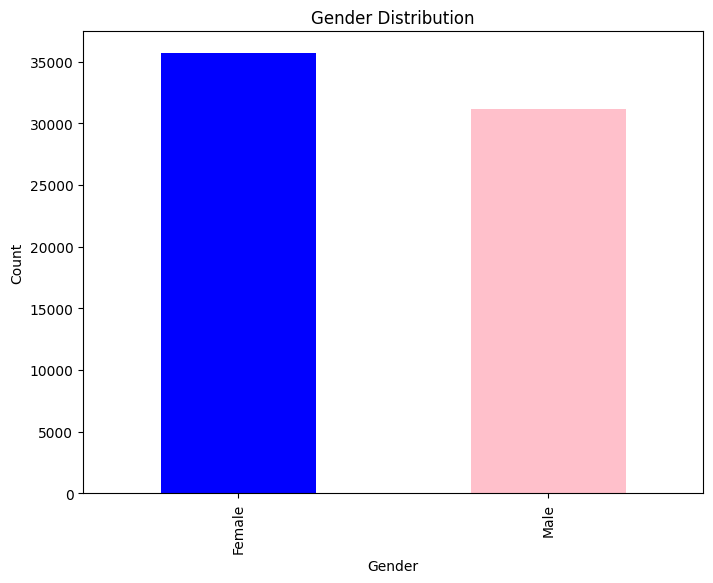

In [ ]:
import matplotlib.pyplot as plt

# Bar chart
plt.figure(figsize=(8, 6))
df['gender'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

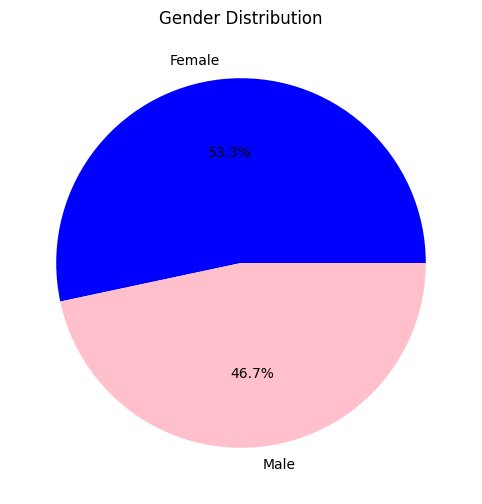

In [ ]:
# Pie chart
plt.figure(figsize=(8, 6))
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'pink'])
plt.title('Gender Distribution')
plt.ylabel('')  # Remove the default ylabel
plt.show()

**Age Distribution**

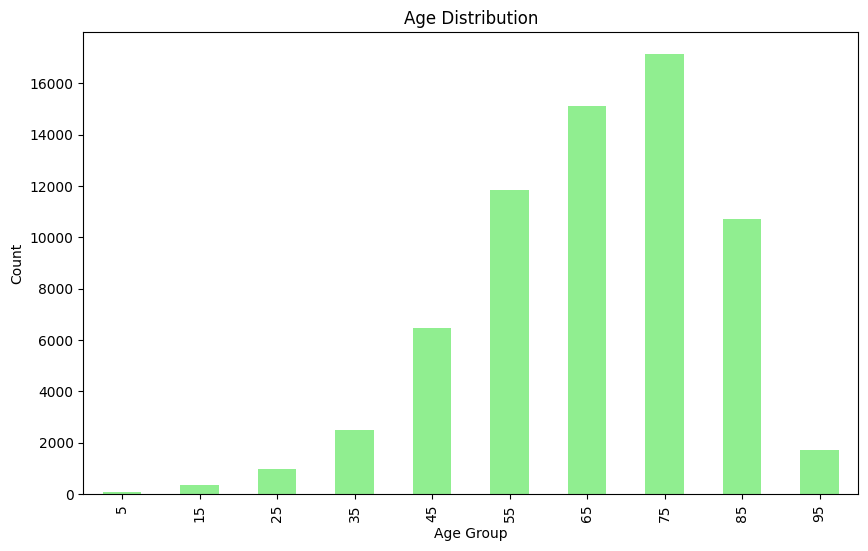

In [ ]:
# Bar chart
plt.figure(figsize=(10, 6))
df['age'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

**Race Distribution**

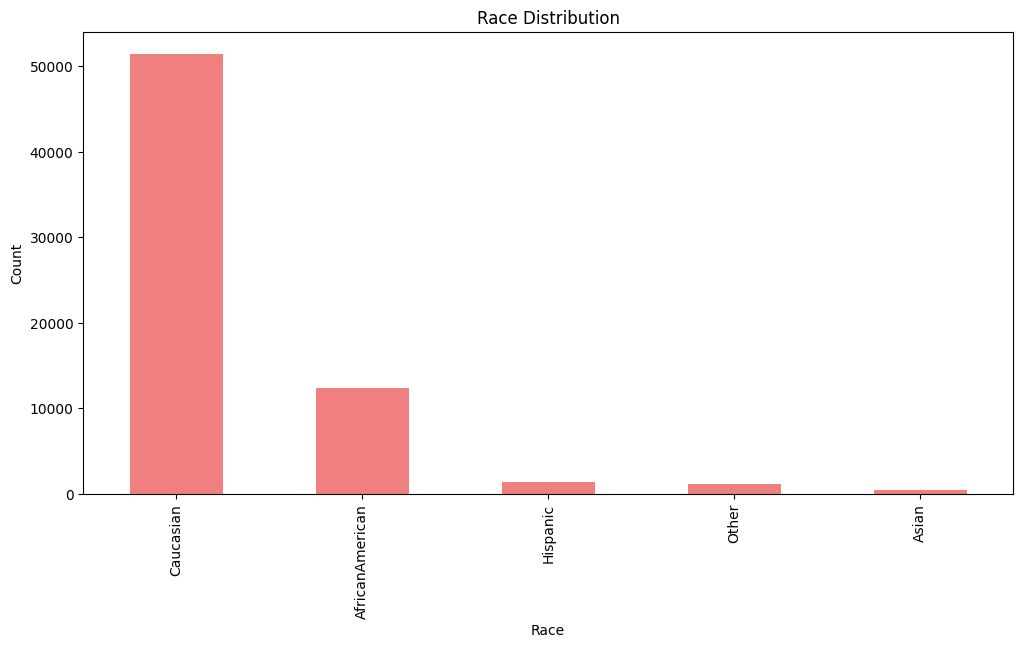

In [ ]:
# Bar chart
plt.figure(figsize=(12, 6))
df['race'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

**Target Variable: Readmitted**

Aim to predict whether a patient will be readmitted within 30 days. To achieve this, transform the readmitted variable into a binary format, where a value of <30 is converted to 1 (indicating readmission within 30 days), and both >30 and No are converted to 0 (indicating no readmission or readmission after 30 days).

In [ ]:
# Convert 'readmitted' to a binary format (1 for '<30', 0 for '>30' or 'No')
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

**1.Target Variable Visualization**

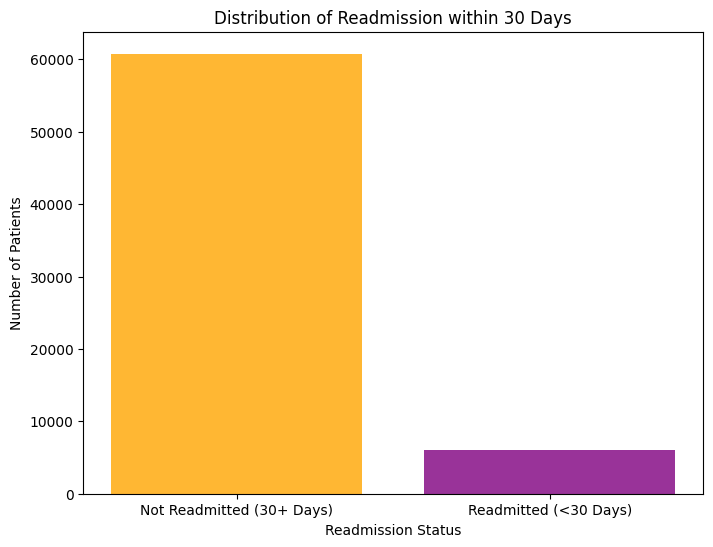

In [ ]:
import matplotlib.pyplot as plt

# Count the number of instances for each class
class_counts = df['readmitted'].value_counts()

# Create a bar plot with alternative title and different color
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, alpha=0.8, color=['orange', 'purple'])
plt.title('Distribution of Readmission within 30 Days')
plt.xlabel('Readmission Status')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['Not Readmitted (30+ Days)', 'Readmitted (<30 Days)'])

plt.show()

**2. Visualization of Histogram Numerical column**

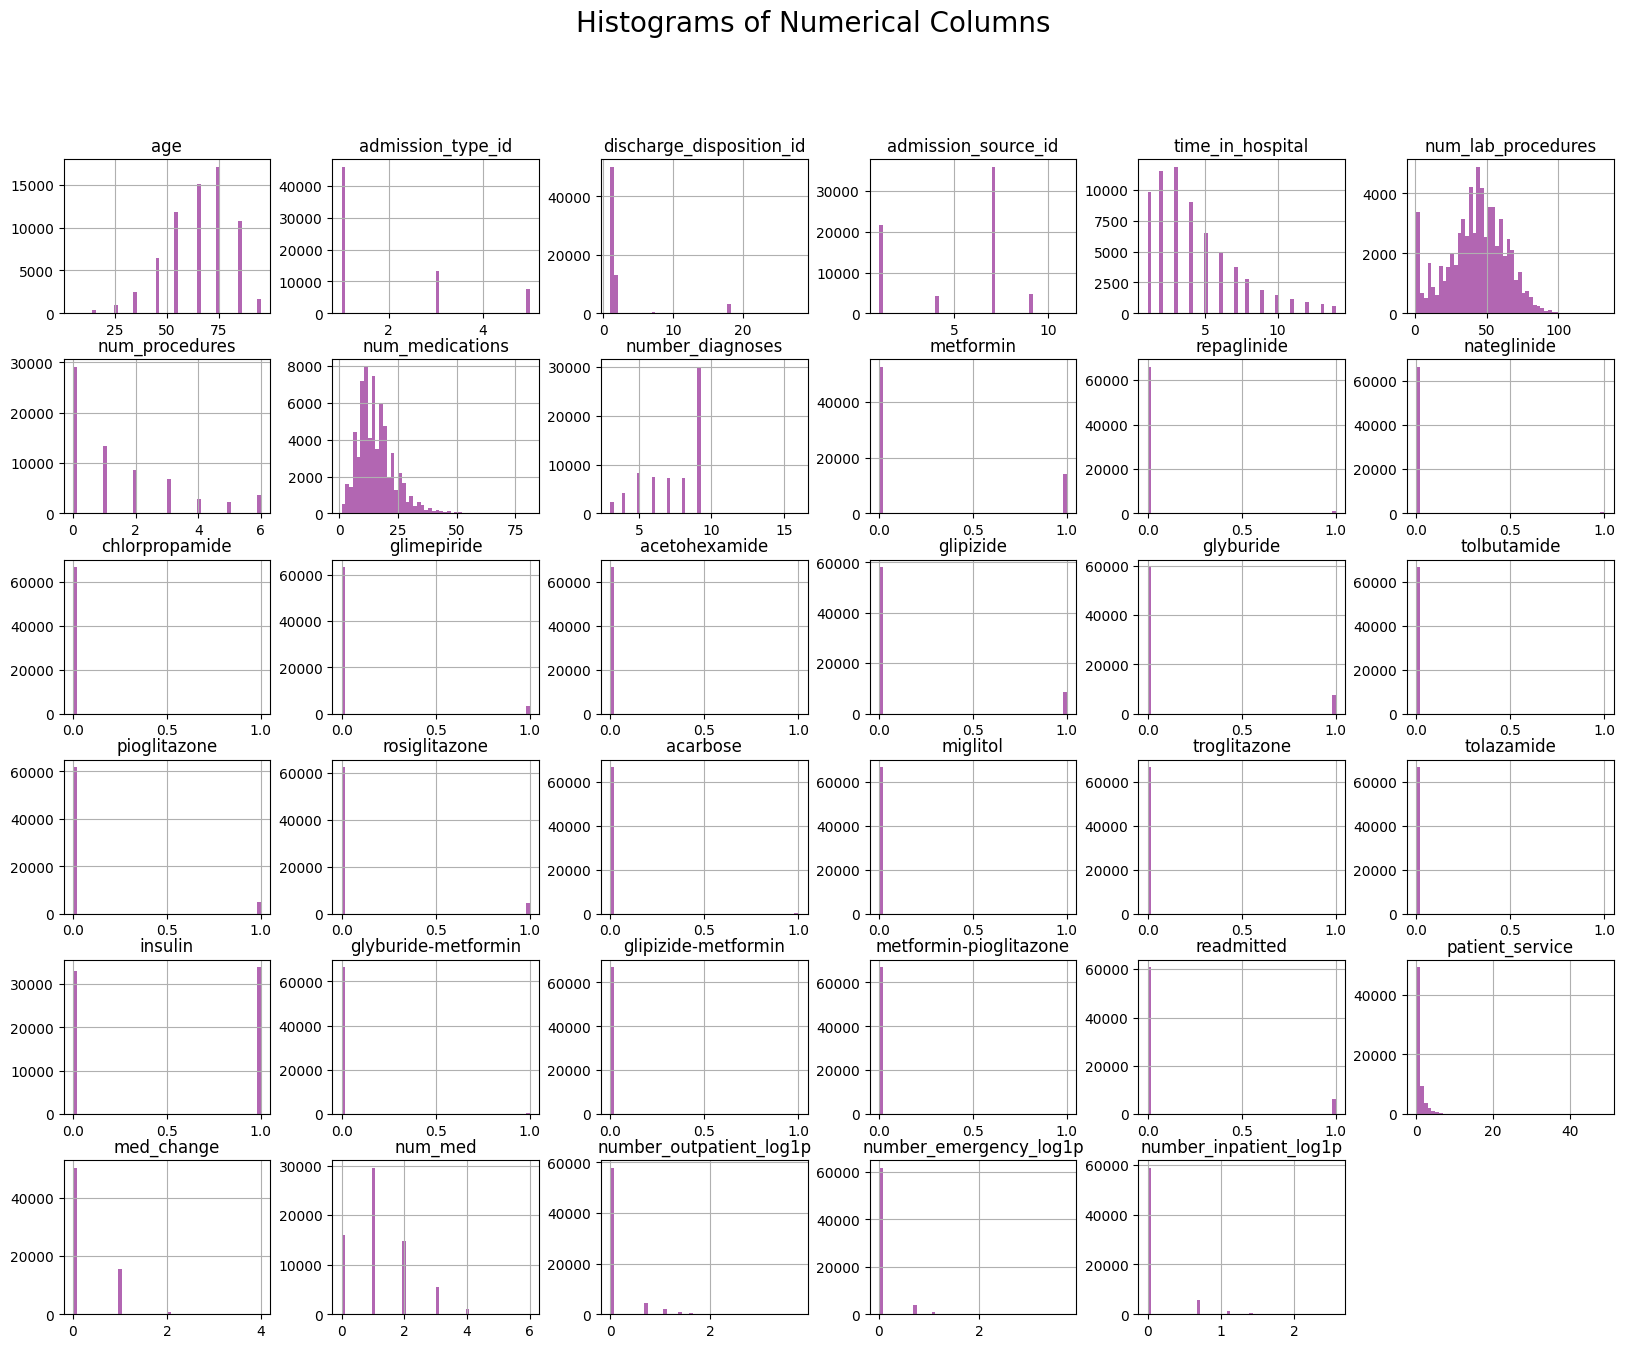

In [ ]:
# Display histograms for each numerical column in the DataFrame
df.hist(bins=50, figsize=(20, 15), color='purple', alpha=0.6)  # Changed color to purple with some transparency
plt.suptitle('Histograms of Numerical Columns', fontsize=20)  # Added a title for the overall plot
plt.show()

**3.Visualizing Distribution of Time in Hospital by Readmission Status**

<ipython-input-31-9411fb311812>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='readmitted', y='time_in_hospital', data=df, palette='pastel')


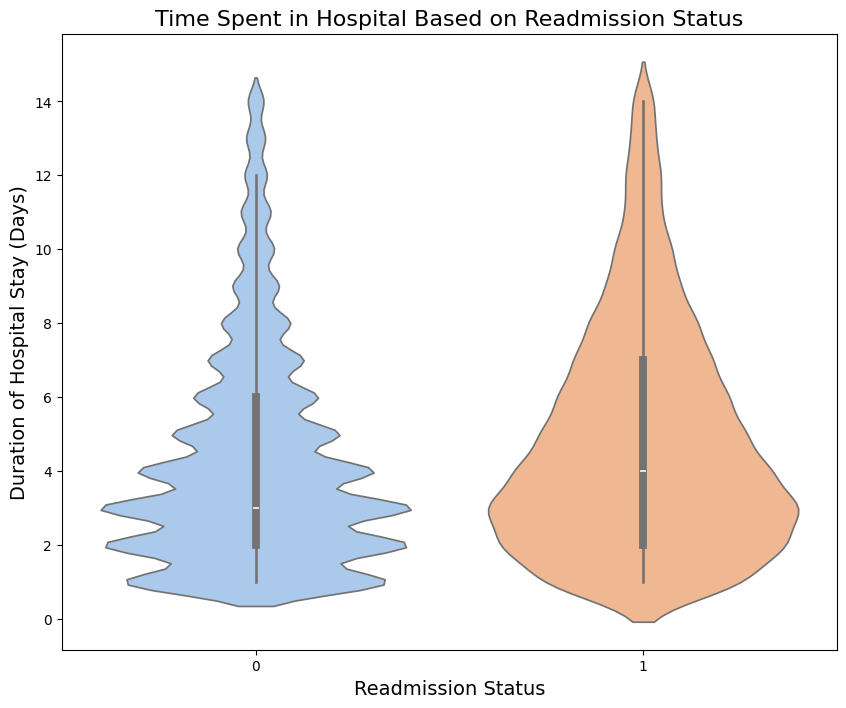

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(10, 8))

# Create a violin plot to visualize the distribution
sns.violinplot(x='readmitted', y='time_in_hospital', data=df, palette='pastel')

# Add title and labels to the plot
plt.title('Time Spent in Hospital Based on Readmission Status', fontsize=16)
plt.xlabel('Readmission Status', fontsize=14)
plt.ylabel('Duration of Hospital Stay (Days)', fontsize=14)

# Display the plot
plt.show()

**4.Visualizing Readmission Counts by Age Group**



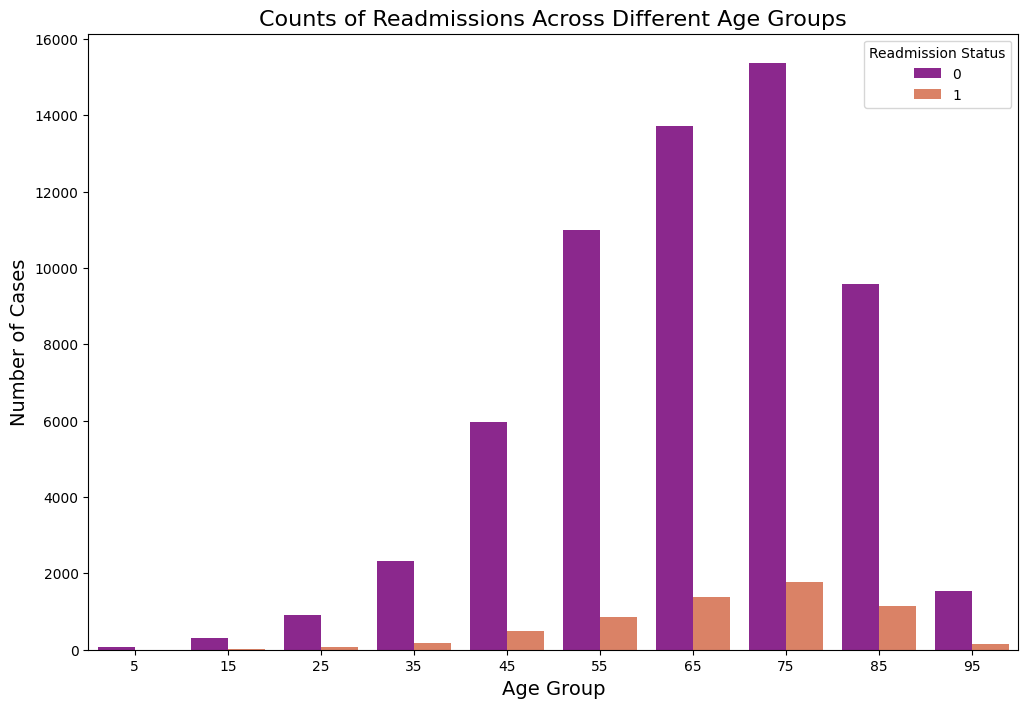

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create a count plot for readmission counts by age group
sns.countplot(x='age', hue='readmitted', data=df, palette='plasma', order=sorted(df['age'].unique()))

# Add title and labels to the plot
plt.title('Counts of Readmissions Across Different Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.legend(title='Readmission Status', loc='upper right')

# Display the plot
plt.show()

**5.Visualizing Distribution of Number of Medications by Readmission Status**

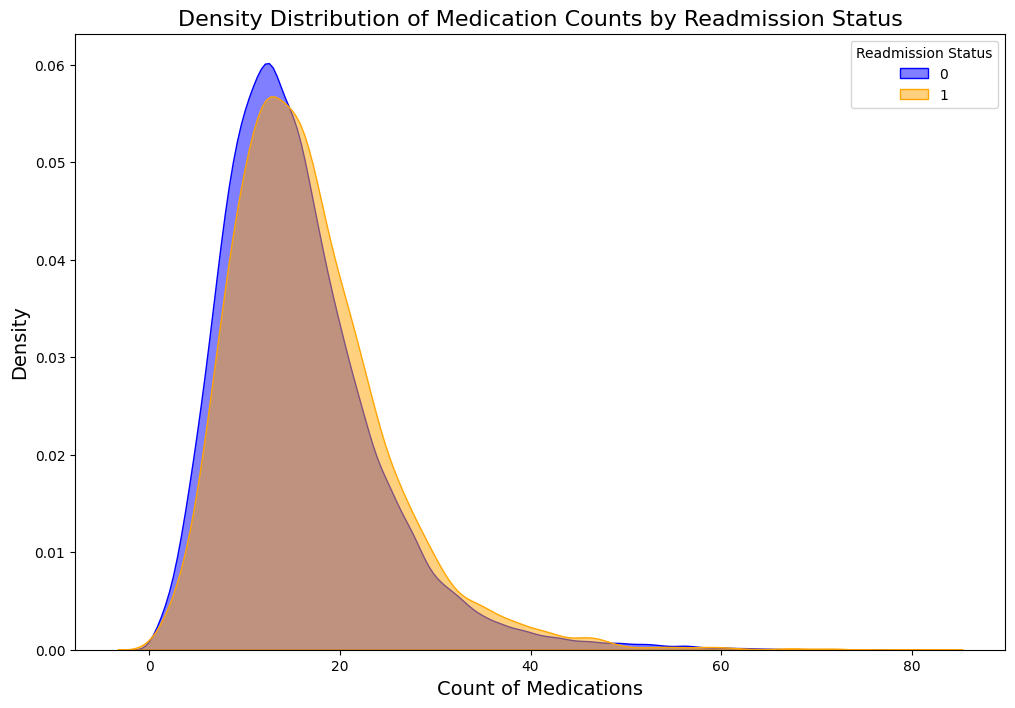

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(12, 8))

# Define a color palette
colors = ['blue', 'orange']  # Adjust colors as needed

# Plot the kernel density estimate for each readmission status with fill
for i, status in enumerate(df['readmitted'].unique()):
    sns.kdeplot(df[df['readmitted'] == status]['num_medications'],
                label=status, fill=True, alpha=0.5, color=colors[i])

# Add title and labels to the plot
plt.title('Density Distribution of Medication Counts by Readmission Status', fontsize=16)
plt.xlabel('Count of Medications', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Readmission Status')

# Display the plot
plt.show()

**6.Visualizing Readmission Count by Discharge Disposition**

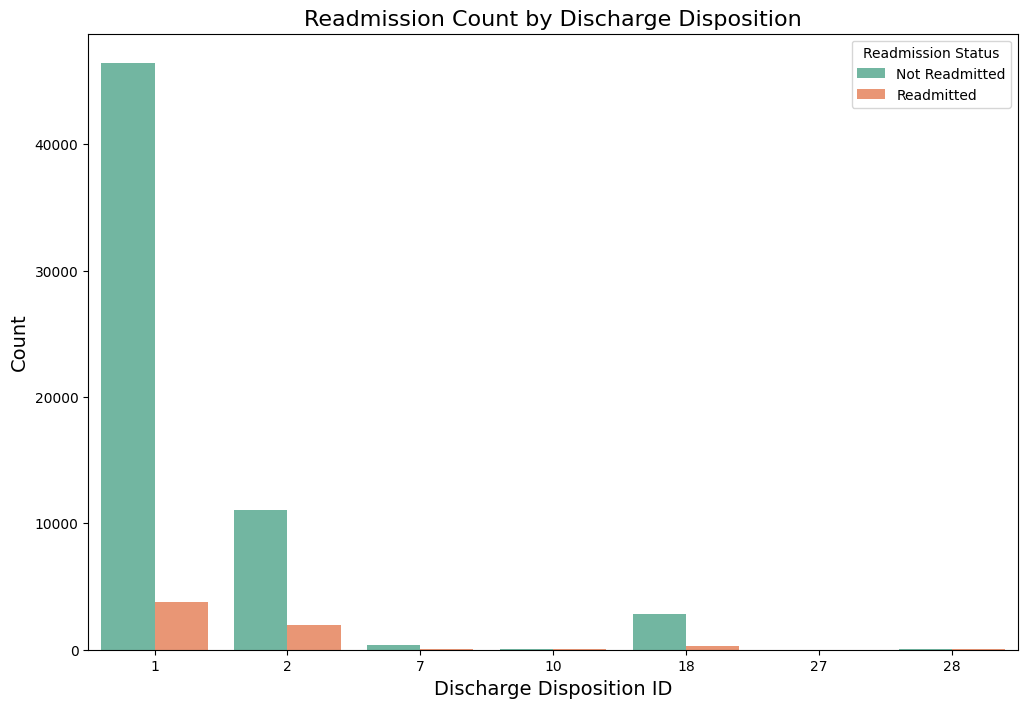

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a count plot with a custom color palette
sns.countplot(x='discharge_disposition_id', hue='readmitted', data=df, palette='Set2')

# Add title and labels to the plot
plt.title('Readmission Count by Discharge Disposition', fontsize=16)
plt.xlabel('Discharge Disposition ID', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Update the legend for clarity
plt.legend(title='Readmission Status', loc='upper right', labels=['Not Readmitted', 'Readmitted'])

# Display the plot
plt.show()

**7.Visualizing Readmission Counts by Number of Procedures**

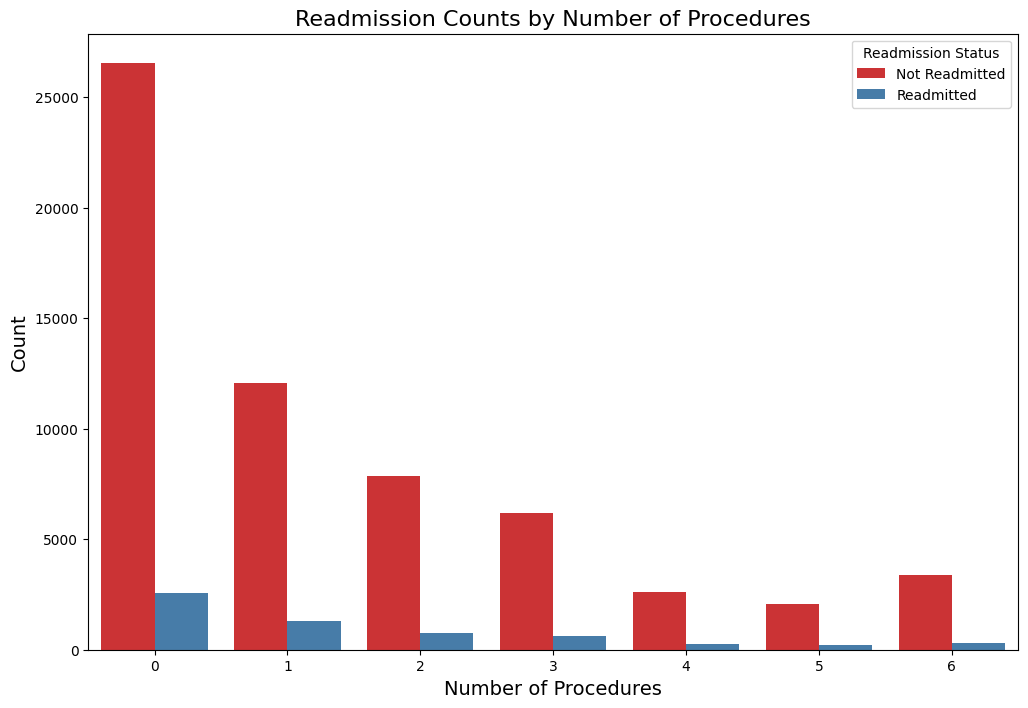

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a count plot with a custom color palette
sns.countplot(x='num_procedures', hue='readmitted', data=df, palette='Set1')

# Add title and labels to the plot
plt.title('Readmission Counts by Number of Procedures', fontsize=16)
plt.xlabel('Number of Procedures', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Update the legend for clarity
plt.legend(title='Readmission Status', loc='upper right', labels=['Not Readmitted', 'Readmitted'])

# Display the plot
plt.show()

**9.Visualizing Distribution of Number of Medications by Readmission Status**

<ipython-input-36-7f65b79fa8a6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='readmitted', y='num_medications', data=df, palette='Set2')


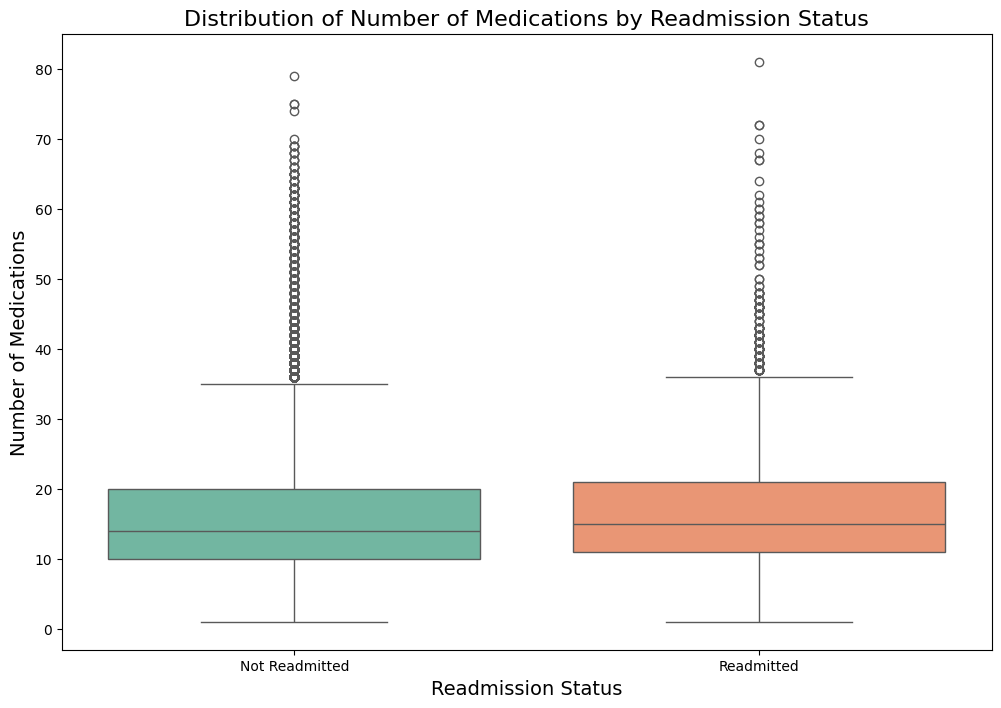

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a box plot with a custom color palette
sns.boxplot(x='readmitted', y='num_medications', data=df, palette='Set2')

# Add title and labels to the plot
plt.title('Distribution of Number of Medications by Readmission Status', fontsize=16)
plt.xlabel('Readmission Status', fontsize=14)
plt.ylabel('Number of Medications', fontsize=14)

# Customize x-tick labels for clarity
plt.xticks(ticks=[0, 1], labels=['Not Readmitted', 'Readmitted'])

# Display the plot
plt.show()

**10.Distribution of Number of Diagnoses by Readmission Status**

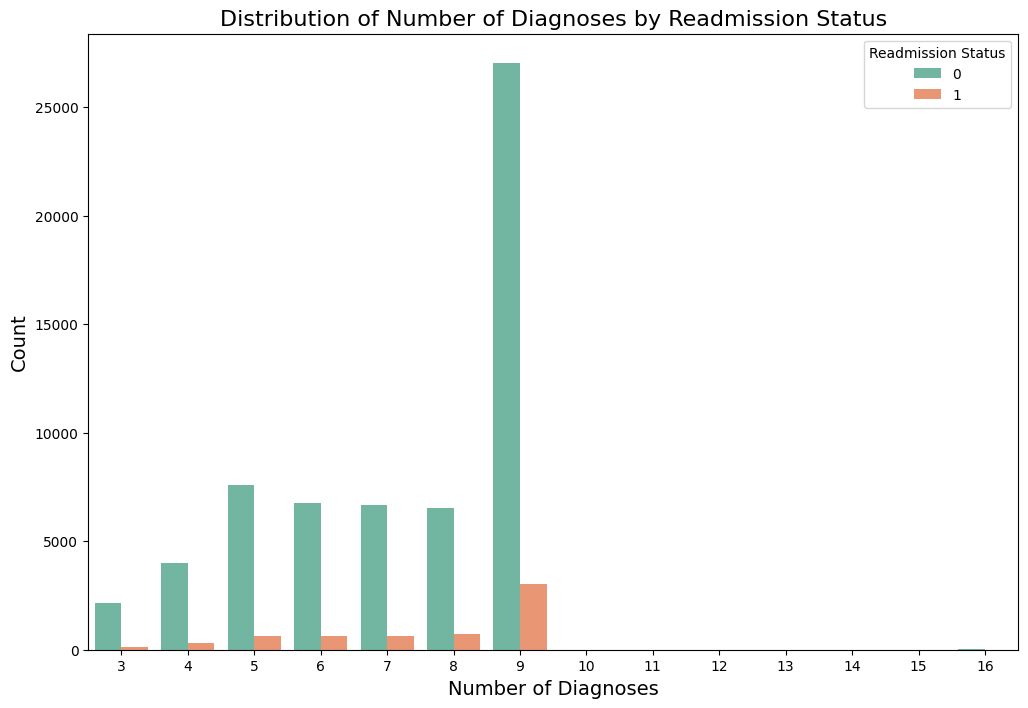

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a count plot with a custom color palette
sns.countplot(x='number_diagnoses', hue='readmitted', data=df, palette='Set2')

# Add title and labels to the plot
plt.title('Distribution of Number of Diagnoses by Readmission Status', fontsize=16)
plt.xlabel('Number of Diagnoses', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize the legend title and position
plt.legend(title='Readmission Status', loc='upper right')

# Display the plot
plt.show()

**11.Readmission Counts by Change in Diabetic Medications**

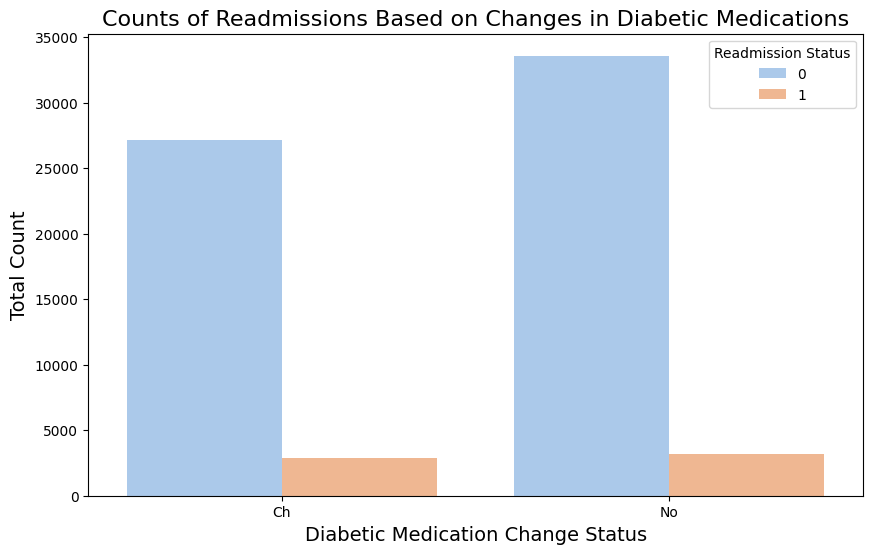

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a count plot with a different color palette
sns.countplot(x='change', hue='readmitted', data=df, palette='pastel')

# Add a new title and labels to the plot
plt.title('Counts of Readmissions Based on Changes in Diabetic Medications', fontsize=16)
plt.xlabel('Diabetic Medication Change Status', fontsize=14)
plt.ylabel('Total Count', fontsize=14)

# Customize the legend title and position
plt.legend(title='Readmission Status', loc='upper right')

# Display the plot
plt.show()

**13.Readmission Counts by Admission Source ID**

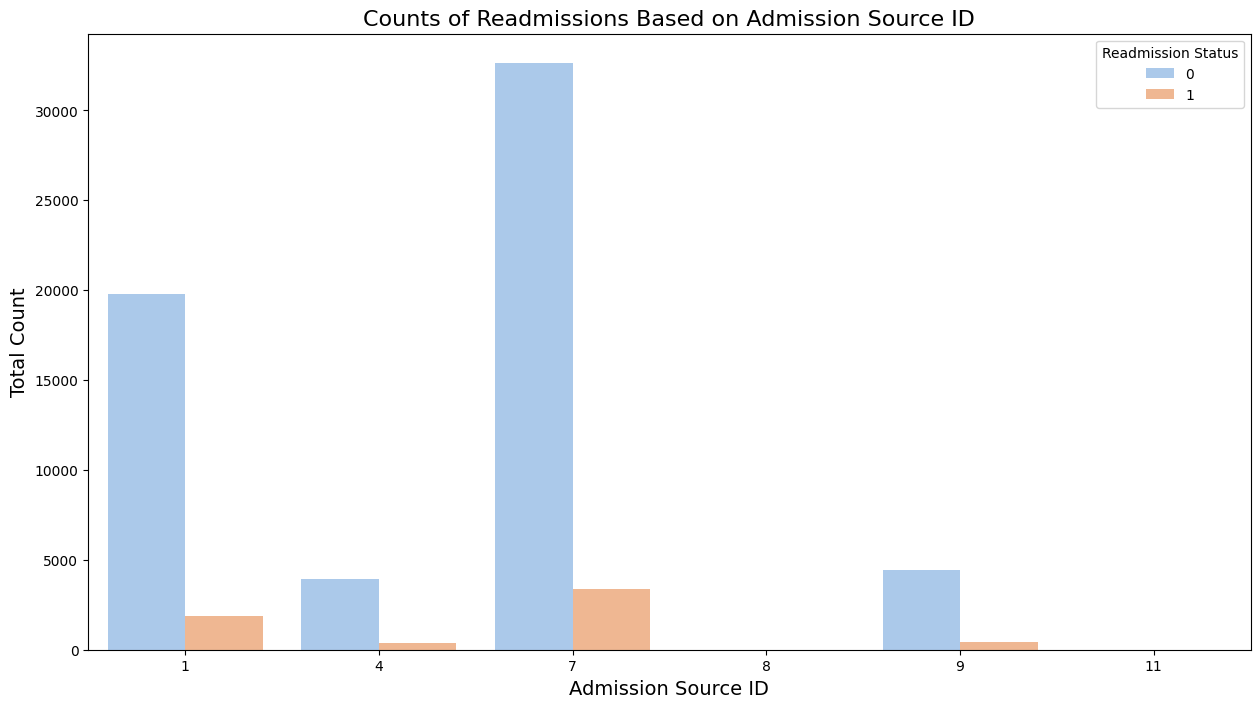

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 8))

# Create a count plot with a different color palette
sns.countplot(x='admission_source_id', hue='readmitted', data=df, palette='pastel')

# Add a new title and labels to the plot
plt.title('Counts of Readmissions Based on Admission Source ID', fontsize=16)
plt.xlabel('Admission Source ID', fontsize=14)
plt.ylabel('Total Count', fontsize=14)

# Customize the legend title and position
plt.legend(title='Readmission Status', loc='upper right')

# Display the plot
plt.show()

In [ ]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,readmitted,diag1_norm,diag2_norm,diag3_norm,patient_service,med_change,num_med,number_outpatient_log1p,number_emergency_log1p,number_inpatient_log1p
0,Caucasian,Female,15,1,1,7,3,missing,59,0,...,0,other,diabetes,other,0,1,1,0.000000,0.000000,0.000000
1,AfricanAmerican,Female,25,1,1,7,2,missing,11,5,...,0,other,diabetes,Other,3,0,1,1.098612,0.000000,0.693147
2,Caucasian,Male,35,1,1,7,2,missing,44,1,...,0,other,diabetes,circulatory,0,1,1,0.000000,0.000000,0.000000
3,Caucasian,Male,45,1,1,7,1,missing,51,0,...,0,neoplasms,neoplasms,diabetes,0,0,2,0.000000,0.000000,0.000000
4,Caucasian,Male,55,1,1,1,3,missing,31,6,...,0,circulatory,circulatory,diabetes,0,0,1,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68352,Caucasian,Female,75,1,1,7,9,missing,50,2,...,0,digestive,digestive,diabetes,0,1,2,0.000000,0.000000,0.000000
68353,Other,Female,45,1,1,7,14,missing,73,6,...,0,genitourinary,genitourinary,respiratory,1,1,2,0.000000,0.693147,0.000000
68354,Other,Female,65,1,1,7,2,missing,46,6,...,0,injury,genitourinary,circulatory,3,0,1,0.693147,0.693147,0.693147
68355,Caucasian,Female,85,1,1,7,5,missing,76,1,...,0,other,other,other,1,1,1,0.000000,0.693147,0.000000


In [ ]:
df_copy = df.copy()


# **Apply Phi-k Correlation Heatmap**

In [ ]:
!pip install phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 28.5 MB/s eta 0:00:00


**Phi-k Correlation Heatmap**

interval columns not set, guessing: ['age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'metformin-pioglitazone', 'readmitted', 'patient_service', 'med_change', 'num_med', 'number_outpatient_log1p', 'number_emergency_log1p', 'number_inpatient_log1p']


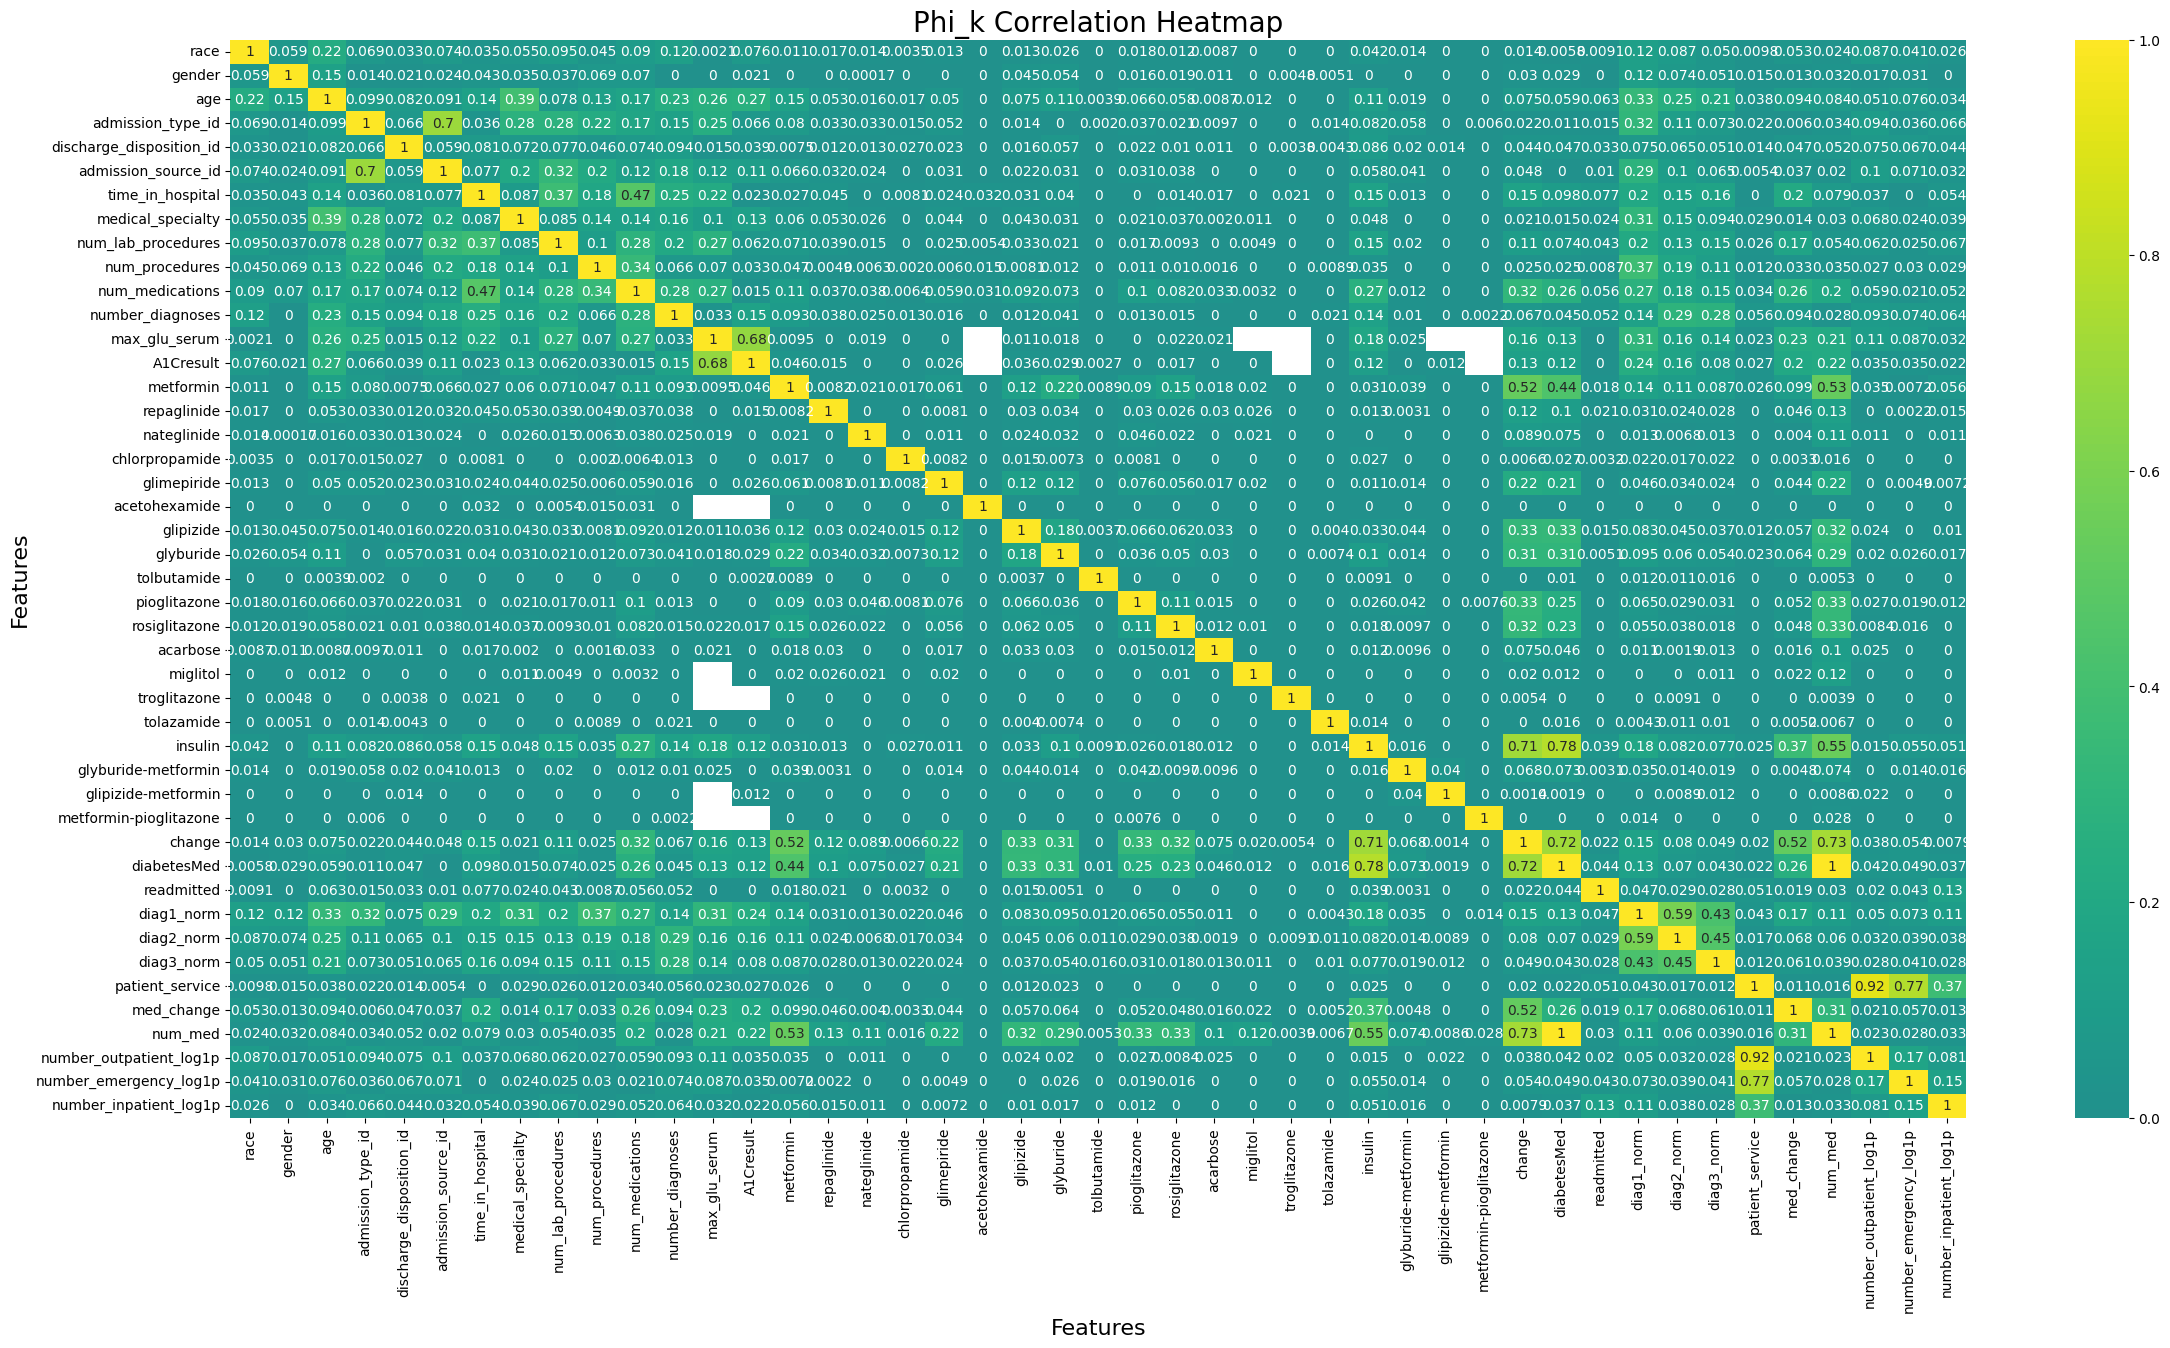

In [ ]:
import pandas as pd
import phik
import seaborn as sns
import matplotlib.pyplot as plt

# Now create a copy
df_copy = df.copy()

# Calculate Phi_k correlation
correlation_matrix = df_copy.phik_matrix()

# Create Heatmap
plt.figure(figsize=(28, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0)
plt.title("Phi_k Correlation Heatmap", fontsize=20)
plt.xlabel("Features", fontsize=16)
plt.ylabel("Features", fontsize=16)
plt.show()

**Identifying Highly Correlated Columns
python**

In [ ]:
# Set correlation threshold
threshold = 0.6

# Create a list to store pairs of highly correlated columns
high_correlation_pairs = []

# Iterate over the correlation matrix
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        # If the correlation coefficient is above threshold and the two columns are not the same
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Print results
if high_correlation_pairs:
    for col1, col2 in high_correlation_pairs:
        print(f"The columns '{col1}' and '{col2}' are highly correlated.")
else:
    print("No highly correlated columns found.")

The columns 'admission_type_id' and 'admission_source_id' are highly correlated.
The columns 'max_glu_serum' and 'A1Cresult' are highly correlated.
The columns 'insulin' and 'change' are highly correlated.
The columns 'insulin' and 'diabetesMed' are highly correlated.
The columns 'change' and 'diabetesMed' are highly correlated.
The columns 'change' and 'num_med' are highly correlated.
The columns 'diabetesMed' and 'num_med' are highly correlated.
The columns 'patient_service' and 'number_outpatient_log1p' are highly correlated.
The columns 'patient_service' and 'number_emergency_log1p' are highly correlated.


This code identifies and removes outliers from a pandas DataFrame. An outlier is defined as an observation that significantly deviates from the other values in a sample. The script employs the Interquartile Range (IQR) method to detect and eliminate these outliers effectively.

In [ ]:
import pandas as pd

# Create a copy of the DataFrame to hold non-outlier rows
df_no_outliers = correlation_matrix.copy()

# Iterate through each column in the correlation matrix
for col in correlation_matrix.columns:
    # Check if the column is numeric
    if correlation_matrix[col].dtype in ['int64', 'float64']:
        # Calculate the first (Q1) and third quartiles (Q3)
        Q1 = correlation_matrix[col].quantile(0.25)
        Q3 = correlation_matrix[col].quantile(0.75)

        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Create a filter to retain only non-outlier rows
        filter_condition = (df_no_outliers[col] >= Q1 - 1.5 * IQR) & (df_no_outliers[col] <= Q3 + 1.5 * IQR)

        # Apply the filter to the DataFrame
        df_no_outliers = df_no_outliers.loc[filter_condition]

# Output the DataFrame without outliers
print("DataFrame without outliers based on the IQR method:")
print(df_no_outliers)

DataFrame without outliers based on the IQR method:
Empty DataFrame
Columns: [race, gender, age, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, insulin, glyburide-metformin, glipizide-metformin, metformin-pioglitazone, change, diabetesMed, readmitted, diag1_norm, diag2_norm, diag3_norm, patient_service, med_change, num_med, number_outpatient_log1p, number_emergency_log1p, number_inpatient_log1p]
Index: []

[0 rows x 45 columns]


**Remove the column 'acetohexamide' from the DataFrame**

In [ ]:
# The 'drop' function is used to drop a specified label (in this case 'acetohexamide') from the data frame.
# 'axis=1' indicates that the label is a column label. If it was a row label, we would use 'axis=0'.
# 'inplace=True' means that the drop operation would be done on the data frame itself, modifying it directly.
# Without 'inplace=True', the 'drop' function would return a new data frame with the operation performed, leaving the original data frame unchanged.
df.drop('acetohexamide', axis=1, inplace=True)
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,readmitted,diag1_norm,diag2_norm,diag3_norm,patient_service,med_change,num_med,number_outpatient_log1p,number_emergency_log1p,number_inpatient_log1p
0,Caucasian,Female,15,1,1,7,3,missing,59,0,...,0,other,diabetes,other,0,1,1,0.000000,0.000000,0.000000
1,AfricanAmerican,Female,25,1,1,7,2,missing,11,5,...,0,other,diabetes,Other,3,0,1,1.098612,0.000000,0.693147
2,Caucasian,Male,35,1,1,7,2,missing,44,1,...,0,other,diabetes,circulatory,0,1,1,0.000000,0.000000,0.000000
3,Caucasian,Male,45,1,1,7,1,missing,51,0,...,0,neoplasms,neoplasms,diabetes,0,0,2,0.000000,0.000000,0.000000
4,Caucasian,Male,55,1,1,1,3,missing,31,6,...,0,circulatory,circulatory,diabetes,0,0,1,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68352,Caucasian,Female,75,1,1,7,9,missing,50,2,...,0,digestive,digestive,diabetes,0,1,2,0.000000,0.000000,0.000000
68353,Other,Female,45,1,1,7,14,missing,73,6,...,0,genitourinary,genitourinary,respiratory,1,1,2,0.000000,0.693147,0.000000
68354,Other,Female,65,1,1,7,2,missing,46,6,...,0,injury,genitourinary,circulatory,3,0,1,0.693147,0.693147,0.693147
68355,Caucasian,Female,85,1,1,7,5,missing,76,1,...,0,other,other,other,1,1,1,0.000000,0.693147,0.000000


# **Applying One-Hot Encoding to 'Race' and 'Gender' Columns in a DataFrame**

In [ ]:
# Convert 'race' column into dummy/indicator variables
df = pd.get_dummies(df, columns = ["race"], prefix = "race", drop_first=True)
# Apply one-hot encoding to 'gender' column
df = pd.get_dummies(df, columns=['gender'], prefix = "race", drop_first=True)
df

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_diagnoses,...,med_change,num_med,number_outpatient_log1p,number_emergency_log1p,number_inpatient_log1p,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_Male
0,15,1,1,7,3,missing,59,0,18,9,...,1,1,0.000000,0.000000,0.000000,False,True,False,False,False
1,25,1,1,7,2,missing,11,5,13,6,...,0,1,1.098612,0.000000,0.693147,False,False,False,False,False
2,35,1,1,7,2,missing,44,1,16,7,...,1,1,0.000000,0.000000,0.000000,False,True,False,False,True
3,45,1,1,7,1,missing,51,0,8,5,...,0,2,0.000000,0.000000,0.000000,False,True,False,False,True
4,55,1,1,1,3,missing,31,6,16,9,...,0,1,0.000000,0.000000,0.000000,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68352,75,1,1,7,9,missing,50,2,33,9,...,1,2,0.000000,0.000000,0.000000,False,True,False,False,False
68353,45,1,1,7,14,missing,73,6,26,9,...,1,2,0.000000,0.693147,0.000000,False,False,False,True,False
68354,65,1,1,7,2,missing,46,6,17,9,...,0,1,0.693147,0.693147,0.693147,False,False,False,True,False
68355,85,1,1,7,5,missing,76,1,22,9,...,1,1,0.000000,0.693147,0.000000,False,True,False,False,False


# **Expanding Diagnosis Categories into Binary Indicators**

In [ ]:
def diagnose(df, diag):
    if (df["diag1_norm"] == diag) | (df["diag2_norm"] == diag) | (df["diag3_norm"] == diag):
        return True
    else:
        return False

# Check for the presence of certain diagnoses and create new columns for each diagnosis
for val in ['diabetes', 'other', 'circulatory', 'neoplasms', 'respiratory', 'injury', 'musculoskeletal', 'digestive', 'genitourinary']:
    name = val + "_diagnosis"
    df[name] = df.apply(diagnose, axis = 1, diag=val).astype(int)
# Define the columns to be dropped
dropped_Cols=['diag1_norm', 'diag2_norm', 'diag3_norm']

# Drop the defined columns from the DataFrame 'df'
df.drop(columns=dropped_Cols, inplace=True)

In [ ]:
df

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_diagnoses,...,race_Male,diabetes_diagnosis,other_diagnosis,circulatory_diagnosis,neoplasms_diagnosis,respiratory_diagnosis,injury_diagnosis,musculoskeletal_diagnosis,digestive_diagnosis,genitourinary_diagnosis
0,15,1,1,7,3,missing,59,0,18,9,...,False,1,1,0,0,0,0,0,0,0
1,25,1,1,7,2,missing,11,5,13,6,...,False,1,1,0,0,0,0,0,0,0
2,35,1,1,7,2,missing,44,1,16,7,...,True,1,1,1,0,0,0,0,0,0
3,45,1,1,7,1,missing,51,0,8,5,...,True,1,0,0,1,0,0,0,0,0
4,55,1,1,1,3,missing,31,6,16,9,...,True,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68352,75,1,1,7,9,missing,50,2,33,9,...,False,1,0,0,0,0,0,0,1,0
68353,45,1,1,7,14,missing,73,6,26,9,...,False,0,0,0,0,1,0,0,0,1
68354,65,1,1,7,2,missing,46,6,17,9,...,False,0,0,1,0,0,1,0,0,1
68355,85,1,1,7,5,missing,76,1,22,9,...,False,0,1,0,0,0,0,0,0,0


# **Binary Encoding of Drug Columns and Removal of Original Columns**

In [ ]:
common_drugs = ['metformin', 'repaglinide', 'glimepiride', 'glipizide',
                'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin']
rare_drugs = ["nateglinide", "chlorpropamide", "tolbutamide",
             "acarbose", "miglitol", "troglitazone", "tolazamide",
             "glyburide-metformin", "glipizide-metformin",
               "metformin-pioglitazone"]

In [ ]:
# Combine common and rare drugs into a single list
drugs = common_drugs + rare_drugs

# Create a binary indicator for each drug in the list using apply and a lambda function
df_binary = df[drugs].apply(lambda x: x.isin(["Down", "Steady", "Up"]).astype(int))

# Rename the binary columns to indicate drug consumption
df_binary.columns = ["take_" + drug for drug in drugs]

# Concatenate the binary DataFrame with the original DataFrame (excluding the original drug columns)
df = pd.concat([df.drop(columns=drugs), df_binary], axis=1)

# Print the updated DataFrame
print(df)

       age  admission_type_id  discharge_disposition_id  admission_source_id  \
0       15                  1                         1                    7   
1       25                  1                         1                    7   
2       35                  1                         1                    7   
3       45                  1                         1                    7   
4       55                  1                         1                    1   
...    ...                ...                       ...                  ...   
68352   75                  1                         1                    7   
68353   45                  1                         1                    7   
68354   65                  1                         1                    7   
68355   85                  1                         1                    7   
68356   75                  1                         1                    7   

       time_in_hospital medical_special

In [ ]:
df

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_diagnoses,...,take_nateglinide,take_chlorpropamide,take_tolbutamide,take_acarbose,take_miglitol,take_troglitazone,take_tolazamide,take_glyburide-metformin,take_glipizide-metformin,take_metformin-pioglitazone
0,15,1,1,7,3,missing,59,0,18,9,...,0,0,0,0,0,0,0,0,0,0
1,25,1,1,7,2,missing,11,5,13,6,...,0,0,0,0,0,0,0,0,0,0
2,35,1,1,7,2,missing,44,1,16,7,...,0,0,0,0,0,0,0,0,0,0
3,45,1,1,7,1,missing,51,0,8,5,...,0,0,0,0,0,0,0,0,0,0
4,55,1,1,1,3,missing,31,6,16,9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68352,75,1,1,7,9,missing,50,2,33,9,...,0,0,0,0,0,0,0,0,0,0
68353,45,1,1,7,14,missing,73,6,26,9,...,0,0,0,0,0,0,0,0,0,0
68354,65,1,1,7,2,missing,46,6,17,9,...,0,0,0,0,0,0,0,0,0,0
68355,85,1,1,7,5,missing,76,1,22,9,...,0,0,0,0,0,0,0,0,0,0


# **One-Hot Encoding for A1C and Glucose Serum Test Results**

In [ ]:
import pandas as pd

# Check if 'A1Cresult' column exists before applying get_dummies
if 'A1Cresult' in df.columns:
    # Apply get_dummies to 'A1Cresult' column
    df = pd.get_dummies(df, columns=['A1Cresult'], drop_first=False)

    # Safely drop 'A1Cresult_None' if it exists
    if 'A1Cresult_None' in df.columns:
        df = df.drop(["A1Cresult_None"], axis=1)
    else:
        print("'A1Cresult_None' column not found in DataFrame.")
else:
    print("'A1Cresult' column not found in DataFrame.")


'A1Cresult_None' column not found in DataFrame.


In [ ]:
import pandas as pd

# Check if 'max_glu_serum' exists before applying get_dummies
if 'max_glu_serum' in df.columns:
    # Apply pd.get_dummies to the 'max_glu_serum' column
    df = pd.get_dummies(df, columns=['max_glu_serum'], drop_first=False)

    # Check if 'max_glu_serum_None' exists before trying to drop it
    if 'max_glu_serum_None' in df.columns:
        df = df.drop(["max_glu_serum_None"], axis=1)
        print("'max_glu_serum_None' column has been dropped.")
    else:
        print("'max_glu_serum_None' column not found in DataFrame.")
else:
    print("'max_glu_serum' column not found in DataFrame.")



'max_glu_serum_None' column not found in DataFrame.


In [ ]:
df

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_diagnoses,...,take_tolazamide,take_glyburide-metformin,take_glipizide-metformin,take_metformin-pioglitazone,A1Cresult_>7,A1Cresult_>8,A1Cresult_Norm,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_Norm
0,15,1,1,7,3,missing,59,0,18,9,...,0,0,0,0,False,False,False,False,False,False
1,25,1,1,7,2,missing,11,5,13,6,...,0,0,0,0,False,False,False,False,False,False
2,35,1,1,7,2,missing,44,1,16,7,...,0,0,0,0,False,False,False,False,False,False
3,45,1,1,7,1,missing,51,0,8,5,...,0,0,0,0,False,False,False,False,False,False
4,55,1,1,1,3,missing,31,6,16,9,...,0,0,0,0,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68352,75,1,1,7,9,missing,50,2,33,9,...,0,0,0,0,True,False,False,False,False,False
68353,45,1,1,7,14,missing,73,6,26,9,...,0,0,0,0,False,True,False,False,False,False
68354,65,1,1,7,2,missing,46,6,17,9,...,0,0,0,0,False,False,False,False,False,False
68355,85,1,1,7,5,missing,76,1,22,9,...,0,0,0,0,False,False,False,False,False,False


# ****Transforming Categorical Features: Change and Diabetes Medication****

The two features require conversion as follows:

For the Change column, replace "Ch" with True and "No" with False.
For the diabetesMed column, change "Yes" to True and "No" to False.

In [ ]:
# Update the 'change' column to boolean values
df.loc[df.change == "Ch", "change"] = True
df.loc[df.change == "No", "change"] = False
df['change'] = df['change'].astype(int)  # Convert boolean values to integers (0 or 1)

# Update the 'diabetesMed' column to boolean values
df.loc[df.diabetesMed == "Yes", "diabetesMed"] = True
df.loc[df.diabetesMed == "No", "diabetesMed"] = False
df['diabetesMed'] = df['diabetesMed'].astype(int)  # Convert boolean values to integers (0 or 1)

# **One-Hot Encoding for the Medical Specialty Column**

In [ ]:
# One-hot encode the 'medical_specialty' column and drop the first column
df = pd.get_dummies(df, columns=['medical_specialty'], prefix=['med_spec'], drop_first=True)

In [ ]:
df = df.drop(["med_spec_missing"], axis = 1)

In [ ]:
target_counts = df['readmitted'].value_counts()
print(target_counts)


readmitted
0    60769
1     6074
Name: count, dtype: int64


# **Model Development**

**Apply Logistic Regression, Decision Tre, Random Forest, AdaBoost**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming df is your dataframe and 'readmitted' is the column to be predicted
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Splitting the data into training, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model

    metrics_val = {}
    metrics_test = {}

    for dataset_name, (X_set, y_set) in [("Val", (X_val, y_val)), ("Test", (X_test, y_test))]:
        # Predictions
        y_pred = model.predict(X_set)
        y_prob = model.predict_proba(X_set)[:, 1]

        # Metrics
        accuracy = accuracy_score(y_set, y_pred)
        precision = precision_score(y_set, y_pred)
        recall = recall_score(y_set, y_pred)
        f1 = f1_score(y_set, y_pred)
        auc_score = roc_auc_score(y_set, y_prob)

        if dataset_name == "Val":
            metrics_val = {
                f"Accuracy ({dataset_name})": accuracy,
                f"Precision ({dataset_name})": precision,
                f"Recall ({dataset_name})": recall,
                f"F1 ({dataset_name})": f1,
                f"AUC ({dataset_name})": auc_score
            }
        else:
            metrics_test = {
                f"Accuracy ({dataset_name})": accuracy,
                f"Precision ({dataset_name})": precision,
                f"Recall ({dataset_name})": recall,
                f"F1 ({dataset_name})": f1,
                f"AUC ({dataset_name})": auc_score
            }

    results.append({
        "Model": name,
        **metrics_val,
        **metrics_test
    })

# Create a dataframe from the results
results_df = pd.DataFrame(results)

# Display the dataframe
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                 Model  Accuracy (Val)  Precision (Val)  Recall (Val)  \
0  Logistic Regression        0.907473         0.000000      0.000000   
1        Decision Tree        0.822724         0.130859      0.162621   
2        Random Forest        0.907547         0.500000      0.001618   
3    Gradient Boosting        0.907099         0.363636      0.006472   
4             AdaBoost        0.907099         0.333333      0.004854   

   F1 (Val)  AUC (Val)  Accuracy (Test)  Precision (Test)  Recall (Test)  \
0  0.000000   0.614580         0.909717          0.000000       0.000000   
1  0.145022   0.526295         0.821976          0.117915       0.149959   
2  0.003226   0.607616         0.909717          0.500000       0.000829   
3  0.012719   0.652202         0.909492          0.411765       0.005800   
4  0.009569   0.645600         0.909492          0.411765       0.005800   

   F1 (Test)  AUC (Test)  
0   0.000000    0.605483  
1   0.132020    0.519314  
2   0.001654    0.60470

In [ ]:
results_df

,Model,Accuracy (Val),Precision (Val),Recall (Val),F1 (Val),AUC (Val),Accuracy (Test),Precision (Test),Recall (Test),F1 (Test),AUC (Test)
0,Logistic Regression,0.907473,0.000000,0.000000,0.000000,0.614580,0.909717,0.000000,0.000000,0.000000,0.605483
1,Decision Tree,0.822724,0.130859,0.162621,0.145022,0.526295,0.821976,0.117915,0.149959,0.132020,0.519314
2,Random Forest,0.907547,0.500000,0.001618,0.003226,0.607616,0.909717,0.500000,0.000829,0.001654,0.604709
3,Gradient Boosting,0.907099,0.363636,0.006472,0.012719,0.652202,0.909492,0.411765,0.005800,0.011438,0.637896
4,AdaBoost,0.907099,0.333333,0.004854,0.009569,0.645600,0.909492,0.411765,0.005800,0.011438,0.634118


# **Implementing Oversampling, Undersampling, SMOTE, and ADASYN Techniques**

**Apply Logistic Regression, Decision Tre, Random Forest, AdaBoost**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

# Assuming df is your dataframe and 'readmitted' is the column to be predicted
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Splitting the data into training, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

sampling_strategies = {
    "Oversampling": RandomOverSampler(),
    "Undersampling": RandomUnderSampler(),
    "SMOTE": SMOTE(),
    "ADASYN": ADASYN()
}

base_models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

results = []

for strategy_name, sampler in sampling_strategies.items():
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

    for model_name, model in base_models.items():
        model.fit(X_resampled, y_resampled)

        metrics_val = {}
        metrics_test = {}

        for dataset_name, (X_set, y_set) in [("Val", (X_val, y_val)), ("Test", (X_test, y_test))]:
            # Predictions
            y_pred = model.predict(X_set)
            y_prob = model.predict_proba(X_set)[:, 1]

            # Metrics
            accuracy = accuracy_score(y_set, y_pred)
            precision = precision_score(y_set, y_pred)
            recall = recall_score(y_set, y_pred)
            f1 = f1_score(y_set, y_pred)
            auc_score = roc_auc_score(y_set, y_prob)

            if dataset_name == "Val":
                metrics_val = {
                    f"Accuracy ({dataset_name})": accuracy,
                    f"Precision ({dataset_name})": precision,
                    f"Recall ({dataset_name})": recall,
                    f"F1 ({dataset_name})": f1,
                    f"AUC ({dataset_name})": auc_score
                }
            else:
                metrics_test = {
                    f"Accuracy ({dataset_name})": accuracy,
                    f"Precision ({dataset_name})": precision,
                    f"Recall ({dataset_name})": recall,
                    f"F1 ({dataset_name})": f1,
                    f"AUC ({dataset_name})": auc_score
                }

        results.append({
            "Model": f"{model_name} ({strategy_name})",
            **metrics_val,
            **metrics_test
        })

# Create a dataframe from the results
results_df = pd.DataFrame(results)

# Display the dataframe
print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` par

                                  Model  Accuracy (Val)  Precision (Val)  \
0    Logistic Regression (Oversampling)        0.608273         0.125164   
1          Decision Tree (Oversampling)        0.830653         0.107034   
2          Random Forest (Oversampling)        0.906799         0.222222   
3      Gradient Boosting (Oversampling)        0.656743         0.146681   
4               AdaBoost (Oversampling)        0.655247         0.142918   
5   Logistic Regression (Undersampling)        0.601840         0.125664   
6         Decision Tree (Undersampling)        0.533922         0.103634   
7         Random Forest (Undersampling)        0.587927         0.125504   
8     Gradient Boosting (Undersampling)        0.625252         0.135855   
9              AdaBoost (Undersampling)        0.634677         0.137808   
10          Logistic Regression (SMOTE)        0.582392         0.122197   
11                Decision Tree (SMOTE)        0.820181         0.120286   
12          

In [ ]:
results_df

,Model,Accuracy (Val),Precision (Val),Recall (Val),F1 (Val),AUC (Val),Accuracy (Test),Precision (Test),Recall (Test),F1 (Test),AUC (Test)
0,Logistic Regression (Oversampling),0.608273,0.125164,0.540453,0.203256,0.613810,0.616202,0.121965,0.524441,0.197905,0.604332
1,Decision Tree (Oversampling),0.830653,0.107034,0.113269,0.110063,0.508501,0.833421,0.117117,0.129246,0.122883,0.516276
2,Random Forest (Oversampling),0.906799,0.222222,0.003236,0.006380,0.614073,0.908669,0.181818,0.003314,0.006509,0.610417
3,Gradient Boosting (Oversampling),0.656743,0.146681,0.563107,0.232737,0.649100,0.651881,0.137234,0.540182,0.218865,0.635612
4,AdaBoost (Oversampling),0.655247,0.142918,0.546117,0.226548,0.643059,0.655995,0.137762,0.534383,0.219052,0.633344
5,Logistic Regression (Undersampling),0.601840,0.125664,0.555016,0.204929,0.608410,0.609320,0.121132,0.531897,0.197326,0.604978
6,Decision Tree (Undersampling),0.533922,0.103634,0.528317,0.173278,0.531405,0.537288,0.102126,0.529412,0.171222,0.533741
7,Random Forest (Undersampling),0.587927,0.125504,0.579288,0.206310,0.620957,0.594734,0.124219,0.576636,0.204405,0.618531
8,Gradient Boosting (Undersampling),0.625252,0.135855,0.569579,0.219383,0.643255,0.623083,0.131397,0.565866,0.213271,0.634030
9,AdaBoost (Undersampling),0.634677,0.137808,0.561489,0.221301,0.637027,0.633705,0.131737,0.546810,0.212321,0.628276


# **Tuning Models with Oversampling, Undersampling, SMOTE, and ADASYN Techniques**

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

# Assuming df is your dataframe and 'readmitted' is the column to be predicted
X = df.drop('readmitted', axis=1)
y = df['readmitted']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

sampling_strategies = {
    "Oversampling": RandomOverSampler(),
    "Undersampling": RandomUnderSampler(),
    "SMOTE": SMOTE(),
    "ADASYN": ADASYN()
}

base_models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

param_grid = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l2'],
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7]
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1]
    }
}

results = []

for strategy_name, sampler in sampling_strategies.items():
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

    for model_name, model in base_models.items():
        clf = GridSearchCV(model, param_grid[model_name], cv=3)
        clf.fit(X_resampled, y_resampled)

        best_model = clf.best_estimator_

        metrics_val = {}
        metrics_test = {}

        for dataset_name, (X_set, y_set) in [("Val", (X_val, y_val)), ("Test", (X_test, y_test))]:
            y_pred = best_model.predict(X_set)
            y_prob = best_model.predict_proba(X_set)[:, 1]

            accuracy = accuracy_score(y_set, y_pred)
            precision = precision_score(y_set, y_pred)
            recall = recall_score(y_set, y_pred)
            f1 = f1_score(y_set, y_pred)
            auc_score = roc_auc_score(y_set, y_prob)

            if dataset_name == "Val":
                metrics_val = {
                    f"Accuracy ({dataset_name})": accuracy,
                    f"Precision ({dataset_name})": precision,
                    f"Recall ({dataset_name})": recall,
                    f"F1 ({dataset_name})": f1,
                    f"AUC ({dataset_name})": auc_score
                }
            else:
                metrics_test = {
                    f"Accuracy ({dataset_name})": accuracy,
                    f"Precision ({dataset_name})": precision,
                    f"Recall ({dataset_name})": recall,
                    f"F1 ({dataset_name})": f1,
                    f"AUC ({dataset_name})": auc_score
                }

        results.append({
            "Model": f"{model_name} ({strategy_name})",
            **metrics_val,
            **metrics_test
        })

results_df = pd.DataFrame(results)
print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

                                  Model  Accuracy (Val)  Precision (Val)  \
0    Logistic Regression (Oversampling)        0.615379         0.127858   
1          Decision Tree (Oversampling)        0.830803         0.113122   
2          Random Forest (Oversampling)        0.907248         0.357143   
3      Gradient Boosting (Oversampling)        0.860872         0.154102   
4               AdaBoost (Oversampling)        0.653826         0.141438   
5   Logistic Regression (Undersampling)        0.611938         0.127591   
6         Decision Tree (Undersampling)        0.653153         0.131528   
7         Random Forest (Undersampling)        0.623382         0.137984   
8     Gradient Boosting (Undersampling)        0.631610         0.139253   
9              AdaBoost (Undersampling)        0.662952         0.143480   
10          Logistic Regression (SMOTE)        0.580522         0.119694   
11                Decision Tree (SMOTE)        0.856085         0.124454   
12          

In [65]:
results_df

,Model,Accuracy (Val),Precision (Val),Recall (Val),F1 (Val),AUC (Val),Accuracy (Test),Precision (Test),Recall (Test),F1 (Test),AUC (Test)
0,Logistic Regression (Oversampling),0.615379,0.127858,0.542880,0.206971,0.615983,0.622260,0.122717,0.517813,0.198413,0.603606
1,Decision Tree (Oversampling),0.830803,0.113122,0.121359,0.117096,0.512217,0.835889,0.112333,0.118476,0.115323,0.512782
2,Random Forest (Oversampling),0.907248,0.357143,0.004045,0.008000,0.620749,0.908969,0.250000,0.004143,0.008150,0.620256
3,Gradient Boosting (Oversampling),0.860872,0.154102,0.112460,0.130028,0.565288,0.861994,0.122038,0.085336,0.100439,0.555257
4,AdaBoost (Oversampling),0.653826,0.141438,0.541262,0.224271,0.642770,0.653302,0.136556,0.533554,0.217457,0.631895
5,Logistic Regression (Undersampling),0.611938,0.127591,0.547735,0.206970,0.614816,0.614406,0.122129,0.528583,0.198414,0.603235
6,Decision Tree (Undersampling),0.653153,0.131528,0.491100,0.207486,0.590191,0.647169,0.126118,0.490472,0.200644,0.584470
7,Random Forest (Undersampling),0.623382,0.137984,0.585761,0.223353,0.645188,0.628319,0.133047,0.565037,0.215380,0.634071
8,Gradient Boosting (Undersampling),0.631610,0.139253,0.576052,0.224287,0.641209,0.632583,0.133241,0.557581,0.215085,0.631206
9,AdaBoost (Undersampling),0.662952,0.143480,0.532362,0.226039,0.610771,0.662802,0.135249,0.507042,0.213538,0.598087
